#libraries

In [ ]:
import numpy as np
import pandas as pd
import re
from tqdm import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Prepare Dataset

## Mapping subjects ID

In [ ]:
subjects_id_list = "/content/drive/MyDrive/dataset/SAcommunity-subject-ID-list.xlsx"

df_subjects = pd.read_excel(subjects_id_list, sheet_name='sacom-subject-IDs')
df_subjects

,Subject,Front ID,Search ID
0,A Cappella,15526,4481
1,Aboriginal Arts & Culture,14141,1126
2,Aboriginal Housing,15559,4515
3,Aboriginal People,14989,3934
4,Abseiling,14332,1387
...,...,...,...
1622,Youth Courts,14040,1023
1623,Youth Hostels,13159,79
1624,Youth Housing,13141,61
1625,Youth Workers,14549,1613


In [ ]:
all_subjects_list = "/content/drive/MyDrive/dataset/AllSubjects-July2023.xlsx"

df_council_subjects = pd.read_excel(all_subjects_list, sheet_name= 0)
print (len(df_council_subjects.columns))
print (len(df_council_subjects.index))
df_council_subjects

88
14403


,Organization Name,Internal Contact ID,Subject_id #1,Subject_id #2,Subject_id #3,Subject_id #4,Subject_id #5,Subject_id #6,Subject_id #7,Subject_id #8,...,Subject_id #77,Subject_id #78,Subject_id #79,Subject_id #80,Subject_id #81,Subject_id #82,Subject_id #83,Subject_id #84,Subject_id #85,Subject_id #86
0,RSL Ardrossan Sub Branch,193932,318.0,360.0,1317.0,1662.0,4038.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,RSL Balaklava Sub Branch,193933,318.0,1317.0,1662.0,4038.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,RSL Barmera Sub Branch,193934,318.0,1317.0,1662.0,4038.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,RSL Berri Sub Branch,193935,318.0,1317.0,1662.0,4038.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,RSL Blanchetown Sub Branch,193936,318.0,1317.0,1662.0,4038.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14398,Adelaide Hills Garden Affair,238388,579.0,1277.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14399,Anangu Pitjantjatjara Yankunytjatjara Communit...,238389,713.0,714.0,3934.0,4423.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14400,Karoonda Districts Football Club Inc.,238390,360.0,373.0,1376.0,1384.0,1386.0,1426.0,1427.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14401,Kazoku Judokan,238393,1384.0,1448.0,1449.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_council_subjects_mapped = df_council_subjects.copy()
df_council_subjects_mapped

,Organization Name,Internal Contact ID,Subject_id #1,Subject_id #2,Subject_id #3,Subject_id #4,Subject_id #5,Subject_id #6,Subject_id #7,Subject_id #8,...,Subject_id #77,Subject_id #78,Subject_id #79,Subject_id #80,Subject_id #81,Subject_id #82,Subject_id #83,Subject_id #84,Subject_id #85,Subject_id #86
0,RSL Ardrossan Sub Branch,193932,318.0,360.0,1317.0,1662.0,4038.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,RSL Balaklava Sub Branch,193933,318.0,1317.0,1662.0,4038.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,RSL Barmera Sub Branch,193934,318.0,1317.0,1662.0,4038.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,RSL Berri Sub Branch,193935,318.0,1317.0,1662.0,4038.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,RSL Blanchetown Sub Branch,193936,318.0,1317.0,1662.0,4038.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14398,Adelaide Hills Garden Affair,238388,579.0,1277.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14399,Anangu Pitjantjatjara Yankunytjatjara Communit...,238389,713.0,714.0,3934.0,4423.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14400,Karoonda Districts Football Club Inc.,238390,360.0,373.0,1376.0,1384.0,1386.0,1426.0,1427.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14401,Kazoku Judokan,238393,1384.0,1448.0,1449.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Find and swap Subject ID's with the Subject Headings

for i in range(df_council_subjects_mapped.shape[0]):
    for j in range(df_council_subjects_mapped.shape[1]):
      #  if j > 1, Change To:  if j > 2, account for extra column at beginning -- StreetAddress-City
      if j > 1:                                             # ignore Organization ID, Organization Name columns, i.e. the 1st 2 columns
         cell_value = df_council_subjects_mapped.iat[i, j]
         if (np.isnan(cell_value)) == False:
            df_selected_row = df_subjects.loc[(df_subjects["Search ID"] == cell_value)]
            if len(df_selected_row.index) != 0:
               subject = df_selected_row['Subject'].values[0]
               df_council_subjects_mapped.iat[i, j] = subject

df_council_subjects_mapped

,Organization Name,Internal Contact ID,Subject_id #1,Subject_id #2,Subject_id #3,Subject_id #4,Subject_id #5,Subject_id #6,Subject_id #7,Subject_id #8,...,Subject_id #77,Subject_id #78,Subject_id #79,Subject_id #80,Subject_id #81,Subject_id #82,Subject_id #83,Subject_id #84,Subject_id #85,Subject_id #86
0,RSL Ardrossan Sub Branch,193932,Ex-Defence Service Groups,Halls For Hire,Social & Activity Groups,Support & Resource Groups,Veterans,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,RSL Balaklava Sub Branch,193933,Ex-Defence Service Groups,Social & Activity Groups,Support & Resource Groups,Veterans,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,RSL Barmera Sub Branch,193934,Ex-Defence Service Groups,Social & Activity Groups,Support & Resource Groups,Veterans,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,RSL Berri Sub Branch,193935,Ex-Defence Service Groups,Social & Activity Groups,Support & Resource Groups,Veterans,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,RSL Blanchetown Sub Branch,193936,Ex-Defence Service Groups,Social & Activity Groups,Support & Resource Groups,Veterans,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14398,Adelaide Hills Garden Affair,238388,Garden Appreciation,Gardening,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14399,Anangu Pitjantjatjara Yankunytjatjara Communit...,238389,Local Government,Councils,Aboriginal People,Indigenous People,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14400,Karoonda Districts Football Club Inc.,238390,Halls For Hire,Sportsgrounds,Sports Facilities,Sport,Sports Clubs & Centres,Football,Football (Australian Rules),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14401,Kazoku Judokan,238393,Sport,Martial Arts,Judo,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:

# Select the columns containing subject IDs
subject_columns = df_council_subjects_mapped.columns[2:]  # Assuming subject IDs start from the 3rd column

# Create an empty dictionary to store the subject counts
subject_counts = {}

# Iterate through each row and count the subjects
for index, row in df_council_subjects_mapped.iterrows():
    for subject_id in row[subject_columns]:
        if pd.notnull(subject_id):
            subject_counts[subject_id] = subject_counts.get(subject_id, 0) + 1

# Print the subjects and their corresponding counts
for subject, count in subject_counts.items():
    print(f"Subject: {subject}, Count: {count}")


Subject: Ex-Defence Service Groups, Count: 150
Subject: Halls For Hire, Count: 778
Subject: Social & Activity Groups, Count: 845
Subject: Support & Resource Groups, Count: 494
Subject: Veterans, Count: 144
Subject: Meals, Count: 79
Subject: Bowling, Count: 75
Subject: Community Organisation & Development, Count: 158
Subject: Community Service Groups, Count: 272
Subject: Defence Service Personnel, Count: 34
Subject: War Victims, Count: 1
Subject: War Widows, Count: 55
Subject: Advocacy, Count: 48
Subject: Clubs/Groups, Count: 57
Subject: Museums, Count: 96
Subject: Hire, Count: 158
Subject: Cricket, Count: 271
Subject: Archery, Count: 20
Subject: Athletics, Count: 64
Subject: Horse Riding Tracks & Trails, Count: 6
Subject: Horse Riding, Count: 89
Subject: Basketball, Count: 103
Subject: Bicycle Safety, Count: 4
Subject: Cycling, Count: 35
Subject: Bowling (Lawn), Count: 152
Subject: Bushwalking, Count: 23
Subject: Canoeing, Count: 16
Subject: Ballroom Dancing, Count: 25
Subject: Dance S

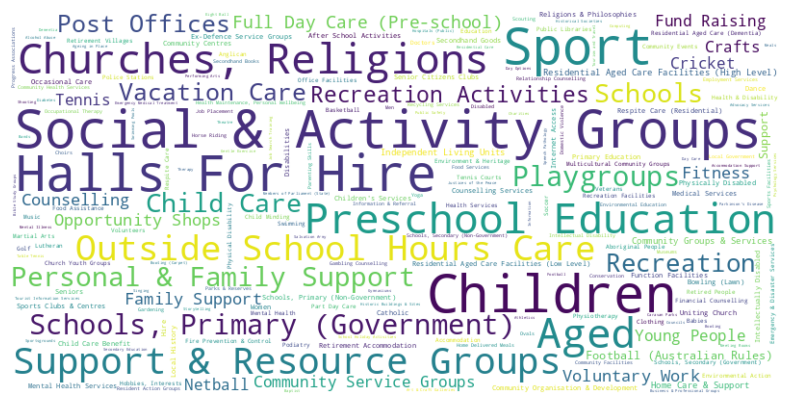

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(subject_counts)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
df_council_subjects_mapped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14403 entries, 0 to 14402
Data columns (total 88 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Organization Name    14403 non-null  object
 1   Internal Contact ID  14403 non-null  int64 
 2   Subject_id #1        14393 non-null  object
 3   Subject_id #2        10635 non-null  object
 4   Subject_id #3        7068 non-null   object
 5   Subject_id #4        4689 non-null   object
 6   Subject_id #5        3239 non-null   object
 7   Subject_id #6        2088 non-null   object
 8   Subject_id #7        1459 non-null   object
 9   Subject_id #8        1083 non-null   object
 10  Subject_id #9        807 non-null    object
 11  Subject_id #10       642 non-null    object
 12  Subject_id #11       532 non-null    object
 13  Subject_id #12       459 non-null    object
 14  Subject_id #13       388 non-null    object
 15  Subject_id #14       352 non-null    object
 16  Subj

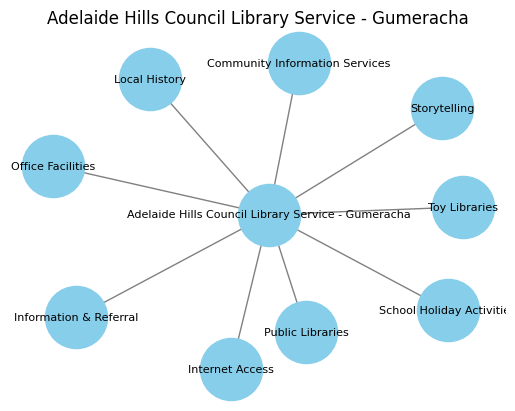

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a new directed graph
G = nx.DiGraph()

# Add nodes for the organization and its topics
organization = "Adelaide Hills Council Library Service - Gumeracha"
topics = [
    "Storytelling",
    "Information & Referral",
    "Public Libraries",
    "Toy Libraries",
    "Local History",
    "School Holiday Activities",
    "Office Facilities",
    "Community Information Services",
    "Internet Access"
]

G.add_node(organization)
for topic in topics:
    G.add_node(topic)
    G.add_edge(organization, topic)

# Create a layout for the nodes
pos = nx.spring_layout(G)

# Draw the nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='skyblue')
nx.draw_networkx_edges(G, pos, edge_color='gray', arrowsize=20)

# Label the nodes
node_labels = {node: node for node in G.nodes}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=8)

# Set plot title and show
plt.title("Adelaide Hills Council Library Service - Gumeracha")
plt.axis('off')
plt.show()


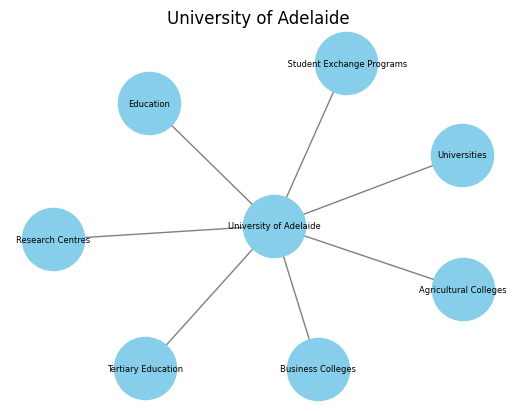

In [ ]:
# Create a new directed graph
G1 = nx.DiGraph()

# Add nodes for the organization and its topics
organization = "University of Adelaide"
topics = ["Education"," Student Exchange Programs", "Tertiary Education", "Agricultural Colleges", "Business Colleges", "Universities", "Research Centres"]

G1.add_node(organization)
for topic in topics:
    G1.add_node(topic)
    G1.add_edge(organization, topic)

# Create a layout for the nodes
pos = nx.spring_layout(G1)

# Draw the nodes and edges
nx.draw_networkx_nodes(G1, pos, node_size=2000, node_color='skyblue')
nx.draw_networkx_edges(G1, pos, edge_color='gray', arrowsize=20)

# Label the nodes
node_labels = {node: node for node in G1.nodes}
nx.draw_networkx_labels(G1, pos, labels=node_labels, font_size=6)

# Set plot title and show
plt.title("University of Adelaide")
plt.axis('off')
plt.show()




## Combine with CiviCRM

In [ ]:
df_civicrm = pd.read_csv("/content/drive/MyDrive/dataset/CiviCRM_Contact_Search.csv")
df_civicrm.head()

<ipython-input-22-735afcc93eb7>:1: DtypeWarning: Columns (5,11,19,20,29,30,31,32,38,43,44,45,60,167) have mixed types. Specify dtype option on import or set low_memory=False.
  df_civicrm = pd.read_csv("/content/drive/MyDrive/dataset/CiviCRM_Contact_Search.csv")


,Organization Name,Street Address,Supplemental Address 1,Supplemental Address 2,City,Postal Code,StreetAddress-State,PostalAddress-Street Address,PostalAddress-Supplemental Address 1,PostalAddress-Supplemental Address 2,...,Accessible parking,ABN,Tax status,Organisation Type,Also Known As,Former Name,Last updated #11 #2,Acronym,Approved,Group(s)
0,RSL Ardrossan Sub Branch,"RSL Hall, West Tce",NaN,NaN,Ardrossan,5571.0,SA,PO Box 133,NaN,NaN,...,NaN,25166174779,DGR,Community,Ardrossan RSL,NaN,NaN,NaN,Approved,"RSL Sub branches,Yorke Peninsula"
1,RSL Balaklava Sub Branch,21 Scotland St,NaN,NaN,Balaklava,5461.0,SA,NaN,NaN,NaN,...,NaN,98 260 727 531,DGR,Community,Balaklava RSL,NaN,NaN,NaN,Approved,"RSL Sub branches,Wakefield"
2,RSL Barmera Sub Branch,21 Sturt St,NaN,NaN,Barmera,5345.0,SA,PO Box 777,NaN,NaN,...,Yes,11763790061,DGR,Community,Barmera RSL,NaN,NaN,NaN,Approved,"Berri Barmera Council,Riverland,RSL Sub branches"
3,RSL Berri Sub Branch,1 Strawbridge St,NaN,NaN,Berri,5343.0,SA,PO Box 192,NaN,NaN,...,NaN,16287240245,DGR,Community,Berri RSL,NaN,NaN,NaN,Approved,"Berri Barmera Council,Riverland,RSL Sub branches"
4,RSL Blanchetown Sub Branch,Egerton St,NaN,NaN,Blanchetown,5357.0,SA,PO Box 183,NaN,NaN,...,NaN,NaN,DGR,Community,Blanchetown RSL,NaN,NaN,NaN,Approved,"Riverland,RSL Sub branches"


In [ ]:
df_civicrm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14407 entries, 0 to 14406
Columns: 171 entries, Organization Name to Group(s)
dtypes: float64(97), int64(2), object(72)
memory usage: 18.8+ MB


In [ ]:
# clean city names

df_civicrm['clean_cities'] = df_civicrm['City'].str.lower().replace(r'\s+', ' ').str.strip()

# Remove cities ending with 'sa'
def clean_city(x):
    if isinstance(x, str):
        return x if not x.endswith('sa') else x[:-2].strip()
    return x

df_civicrm['clean_cities'] = df_civicrm['clean_cities'].apply(clean_city)

# Remove comma from the end of city names
df_civicrm['clean_cities'] = df_civicrm['clean_cities'].str.rstrip(',')

print(len(df_civicrm['clean_cities'].unique()))
print(list(df_civicrm['clean_cities'].unique()))


987
['ardrossan', 'balaklava', 'barmera', 'berri', 'blanchetown', 'bordertown', 'brighton', 'brinkworth', 'burra', 'ceduna', 'coober pedy', 'penola', 'cowell', 'edithburgh', 'elizabeth east', 'eudunda', 'freeling', 'glynde', 'jamestown', 'kadina', 'keith', 'kimba', 'kingston', 'laura', 'loxton', 'lucindale', 'mallala', 'mannum', 'millicent', 'meningie', 'moonta', 'morgan', 'naracoorte', 'peterborough', 'pinnaroo', 'port lincoln', 'port pirie west', 'port victoria', 'port vincent', 'port wakefield', 'renmark', 'robe', 'robertstown', 'roxby downs', 'snowtown', 'stansbury', 'streaky bay', 'swan reach', 'tailem bend', 'tea tree gully', 'tumby bay', 'victor harbor', 'wallaroo', 'woomera', 'yankalilla', 'yorketown', 'north adelaide', 'adelaide', 'mile end', 'richmond', 'keswick', 'glenelg north', 'south brighton', 'west lakes', 'devon park', 'oaklands park', 'new port', 'mount barker', 'lightsview', 'st marys', 'angle park', 'kent town', 'globe derby park', 'woodside', 'prospect', 'west beac

In [ ]:
selected_columns = ['Organization Name', 'clean_cities', 'Eligibility', 'Fees', 'Internal Contact ID',
                    'Venue hire new', 'GT_summary', 'Comment', 'Services', 'Tag Line', 'Organisation Type', 'Also Known As', 'Former Name', 'Acronym']

df_civicrm_filtered = df_civicrm[selected_columns]

In [ ]:
df_civicrm_filtered

,Organization Name,clean_cities,Eligibility,Fees,Internal Contact ID,Venue hire new,GT_summary,Comment,Services,Tag Line,Organisation Type,Also Known As,Former Name,Acronym
0,RSL Ardrossan Sub Branch,ardrossan,Serving and ex-service men and women and their...,NaN,193932,Hall/Clubrooms for hire,NaN,NaN,Welfare and pensions support for ex-servicemen...,NaN,Community,Ardrossan RSL,NaN,NaN
1,RSL Balaklava Sub Branch,balaklava,Serving and ex-service men and women and their...,NaN,193933,NaN,NaN,The RSL was founded in 1916 to provide comrade...,Welfare and pensions support for ex-servicemen...,Organization to provide comradeship and suppor...,Community,Balaklava RSL,NaN,NaN
2,RSL Barmera Sub Branch,barmera,Serving and ex-service men and women and their...,Memberships for Service and ex Service availab...,193934,Hall hire available for private functions. Cat...,NaN,NaN,Welfare and pensions support for ex-servicemen...,NaN,Community,Barmera RSL,NaN,NaN
3,RSL Berri Sub Branch,berri,Serving and ex-service men and women and their...,NaN,193935,NaN,NaN,NaN,Welfare and pensions support for ex-servicemen...,NaN,Community,Berri RSL,NaN,NaN
4,RSL Blanchetown Sub Branch,blanchetown,Serving and ex-service men and women and their...,NaN,193936,NaN,NaN,NaN,Welfare and pensions support for ex-servicemen...,NaN,Community,Blanchetown RSL,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14402,Lutheran Church - Karoonda,karoonda,NaN,NaN,238400,NaN,NaN,&nbsp;Lutheran Churches services,Churches services and pastoral care,Lutheran Church,Government,St Johns Lutheran Church Karoonda Inc.,NaN,NaN
14403,Uniting Church - Karoonda,karoonda,NaN,NaN,238401,NaN,NaN,Uniting Church services,Churches services and pastoral care,Uniting Church,None,Karoonda Districts Uniting Church,NaN,NaN
14404,Avon District Hall Inc.,avon,NaN,NaN,238407,"Capacity 100\nStage\nKitchen, oven, fridge, cu...",NaN,NaN,Hall for Hire,Community Hall for hire,Community,NaN,NaN,NaN
14405,Karoonda Men's Shed,karoonda,NaN,NaN,238408,NaN,NaN,Social and workshop activities for men,Social and workshop activities for men.\nDrop ...,Men's Shed,Government,NaN,NaN,NaN


In [ ]:
cross_joined_df = pd.merge(df_council_subjects_mapped, df_civicrm_filtered, on=['Organization Name', 'Internal Contact ID'])


In [ ]:
cross_joined_df

,Organization Name,Internal Contact ID,Subject_id #1,Subject_id #2,Subject_id #3,Subject_id #4,Subject_id #5,Subject_id #6,Subject_id #7,Subject_id #8,...,Fees,Venue hire new,GT_summary,Comment,Services,Tag Line,Organisation Type,Also Known As,Former Name,Acronym
0,RSL Ardrossan Sub Branch,193932,Ex-Defence Service Groups,Halls For Hire,Social & Activity Groups,Support & Resource Groups,Veterans,NaN,NaN,NaN,...,NaN,Hall/Clubrooms for hire,NaN,NaN,Welfare and pensions support for ex-servicemen...,NaN,Community,Ardrossan RSL,NaN,NaN
1,RSL Balaklava Sub Branch,193933,Ex-Defence Service Groups,Social & Activity Groups,Support & Resource Groups,Veterans,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,The RSL was founded in 1916 to provide comrade...,Welfare and pensions support for ex-servicemen...,Organization to provide comradeship and suppor...,Community,Balaklava RSL,NaN,NaN
2,RSL Barmera Sub Branch,193934,Ex-Defence Service Groups,Social & Activity Groups,Support & Resource Groups,Veterans,NaN,NaN,NaN,NaN,...,Memberships for Service and ex Service availab...,Hall hire available for private functions. Cat...,NaN,NaN,Welfare and pensions support for ex-servicemen...,NaN,Community,Barmera RSL,NaN,NaN
3,RSL Berri Sub Branch,193935,Ex-Defence Service Groups,Social & Activity Groups,Support & Resource Groups,Veterans,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Welfare and pensions support for ex-servicemen...,NaN,Community,Berri RSL,NaN,NaN
4,RSL Blanchetown Sub Branch,193936,Ex-Defence Service Groups,Social & Activity Groups,Support & Resource Groups,Veterans,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Welfare and pensions support for ex-servicemen...,NaN,Community,Blanchetown RSL,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14342,Gerard Aboriginal Community Council,238387,Local Government,Councils,Aboriginal People,Indigenous People,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Municipal services,NaN,Government,GERARD COMMUNITY COUNCIL ABORIGINAL CORPORATION,NaN,NaN
14343,Adelaide Hills Garden Affair,238388,Garden Appreciation,Gardening,NaN,NaN,NaN,NaN,NaN,NaN,...,Tickets available from 1 Dec 2023. All ticket...,NaN,NaN,"Stalls, speakers, demonstrations, children's a...",NaN,An event for the love of gardening,Government,NaN,NaN,NaN
14344,Anangu Pitjantjatjara Yankunytjatjara Communit...,238389,Local Government,Councils,Aboriginal People,Indigenous People,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Municipal services\nOversees the activities of...,NaN,Government,APY Lands,NaN,APY
14345,Karoonda Districts Football Club Inc.,238390,Halls For Hire,Sportsgrounds,Sports Facilities,Sport,Sports Clubs & Centres,Football,Football (Australian Rules),NaN,...,NaN,\n Karoonda District Football Clubrooms\n ...,NaN,Karoonda Districts Football Club is a sports c...,Football\nHall for hire,Football Club,Government,Karoonda Mallee Magpies,NaN,NaN


In [ ]:
cross_joined_df.to_csv('cross_joined_data.csv', index=False)

# Read File

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/dataset/cross_joined_data.csv")
df.head()

<ipython-input-74-227c95516c6a>:1: DtypeWarning: Columns (70,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/dataset/cross_joined_data.csv")


,Organization Name,Internal Contact ID,Subject_id #1,Subject_id #2,Subject_id #3,Subject_id #4,Subject_id #5,Subject_id #6,Subject_id #7,Subject_id #8,...,Fees,Venue hire new,GT_summary,Comment,Services,Tag Line,Organisation Type,Also Known As,Former Name,Acronym
0,RSL Ardrossan Sub Branch,193932,Ex-Defence Service Groups,Halls For Hire,Social & Activity Groups,Support & Resource Groups,Veterans,NaN,NaN,NaN,...,NaN,Hall/Clubrooms for hire,NaN,NaN,Welfare and pensions support for ex-servicemen...,NaN,Community,Ardrossan RSL,NaN,NaN
1,RSL Balaklava Sub Branch,193933,Ex-Defence Service Groups,Social & Activity Groups,Support & Resource Groups,Veterans,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,The RSL was founded in 1916 to provide comrade...,Welfare and pensions support for ex-servicemen...,Organization to provide comradeship and suppor...,Community,Balaklava RSL,NaN,NaN
2,RSL Barmera Sub Branch,193934,Ex-Defence Service Groups,Social & Activity Groups,Support & Resource Groups,Veterans,NaN,NaN,NaN,NaN,...,Memberships for Service and ex Service availab...,Hall hire available for private functions. Cat...,NaN,NaN,Welfare and pensions support for ex-servicemen...,NaN,Community,Barmera RSL,NaN,NaN
3,RSL Berri Sub Branch,193935,Ex-Defence Service Groups,Social & Activity Groups,Support & Resource Groups,Veterans,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Welfare and pensions support for ex-servicemen...,NaN,Community,Berri RSL,NaN,NaN
4,RSL Blanchetown Sub Branch,193936,Ex-Defence Service Groups,Social & Activity Groups,Support & Resource Groups,Veterans,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Welfare and pensions support for ex-servicemen...,NaN,Community,Blanchetown RSL,NaN,NaN


# Check if branches = 1; contains "Branch"

In [ ]:
# Add a new column 'Branches' with value 1 where 'Organization Name' contains "Branch"
df['Branches'] = df['Organization Name'].str.contains("Branch").astype(int)
# Add a new column 'Branches' with value 1 where 'Organization Name' contains "Branch"
df['Branches'] = df['Organization Name'].str.contains("Branch").astype(int)
filtered_df_branches = df[df['Branches'] == 1]

filtered_df_branches[['Organization Name', 'Internal Contact ID', 'Branches']]


,Organization Name,Internal Contact ID,Branches
0,RSL Ardrossan Sub Branch,193932,1
1,RSL Balaklava Sub Branch,193933,1
2,RSL Barmera Sub Branch,193934,1
3,RSL Berri Sub Branch,193935,1
4,RSL Blanchetown Sub Branch,193936,1
...,...,...,...
13312,Knights of the Southern Cross - Mt Barker/Stra...,235051,1
13431,Sporting Shooters Association of Australia Par...,235416,1
13937,National Servicemen's Association of Australia...,236970,1
13938,National Servicemen's Association of Australia...,236971,1


city, drop duplicate

In [ ]:
df_branch = df.copy()
result_df_branch = df_branch[['Organization Name', 'Internal Contact ID', 'Branches']]
print(len(result_df_branch['Internal Contact ID']))
# keep only one record of each kind
filtered_df_branch_solo = result_df_branch.drop_duplicates(subset='Organization Name', keep='first')

# Save the filtered DataFrame to a new CSV file
filtered_df_branch_solo.to_csv('filtered_df_branch.csv', index=False)

print(filtered_df_branch_solo[['Organization Name', 'Internal Contact ID', 'Branches']])
print(len(filtered_df_branch_solo['Internal Contact ID']))

14347
                                       Organization Name  Internal Contact ID  \
0                               RSL Ardrossan Sub Branch               193932   
1                               RSL Balaklava Sub Branch               193933   
2                                 RSL Barmera Sub Branch               193934   
3                                   RSL Berri Sub Branch               193935   
4                             RSL Blanchetown Sub Branch               193936   
...                                                  ...                  ...   
14342                Gerard Aboriginal Community Council               238387   
14343                       Adelaide Hills Garden Affair               238388   
14344  Anangu Pitjantjatjara Yankunytjatjara Communit...               238389   
14345              Karoonda Districts Football Club Inc.               238390   
14346                                     Kazoku Judokan               238393   

       Branches  
0  

manually find groups - NOT WORK

In [ ]:
! pip install thefuzz

In [ ]:
from thefuzz import fuzz
from thefuzz import process

/usr/local/lib/python3.10/dist-packages/thefuzz/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
filtered_df_non_branch = result_df_branch[result_df_branch['Branches'] == 0]

# Define the target organization names as a list
target_string = [
    "Meals on Wheels SA",
    "Salvos Stores",
    "Neighbourhood Watch",
    "Australian Red Cross",
    "Skylight Mental Health",
    "Country Fire Service",
    "South Australian Country Women's Association",
    "Toastmasters International",
    "Statewide Group Training SA",
    "UnitingSA Community Aged Care",
    "Life Care",
    "Australian School of Meditation and Yoga",
    "Community Bridging Services (CBS) Inc.",
    "Bushfire Recovery Centre",
    "Justices of the Peace",
    "ADRA Community Pantry",
    "Disability Royal Commission Counselling Service",
    "Department for Child Protection",
]

def is_similar_known(name):
    return any(fuzz.ratio(name, target) >= 75 for target in target_string)

# Use the function to create a boolean mask for similar organization names
similar_to_non_branch_mask = filtered_df_non_branch['Organization Name'].apply(is_similar_known)

# Count the number of True values (similar to any target organization name)
count_similar_to_branch = similar_to_non_branch_mask.sum()

# Filter the DataFrame to show the organization names that are similar to any target organization name
similar_to_branch_organizations = filtered_df_non_branch[similar_to_non_branch_mask]['Organization Name']

print("Number of organization names similar to any target organization name:", count_similar_to_branch)
print("Organization names similar to any target organization name:")
print(similar_to_branch_organizations)




Number of organization names similar to any target organization name: 261
Organization names similar to any target organization name:
90                    South Australian Cricket Association
94                 South Australian Darts Association Inc.
108       South Australian Women's Cricket Association Inc
157                           Waikerie Neighbourhood Watch
161                       Australian Red Cross - Waikerie 
                               ...                        
14008                                Salvos Stores - Berri
14125    Disability Royal Commission Counselling Servic...
14126    Disability Royal Commission Counselling Servic...
14127    Disability Royal Commission Counselling Servic...
14226    South Australian Country Women's Association -...
Name: Organization Name, Length: 261, dtype: object


In [ ]:
# Function to check if an organization name is similar to any other organization name using fuzzy matching
def is_similar_to_other(name, organization_names):
    for org_name in organization_names:
        if fuzz.ratio(name, org_name) >= 75:  # You can adjust the similarity threshold as needed
            return True
    return False

# Use the function to create a boolean mask for unique organization names
unique_organization_mask = ~result_df_branch['Organization Name'].apply(is_similar_to_other, organization_names=result_df_branch['Organization Name'])

# Filter the DataFrame to show only rows where 'Branches' column has value 1 and the organization name is unique
filtered_df = result_df_branch[result_df_branch['Branches'] == 1 & unique_organization_mask]

print(filtered_df[['Organization Name', 'Internal Contact ID', 'Branches']])

KeyboardInterrupt: ignored

In [ ]:
print(fuzz.ratio('RSL Ardrossan Sub Branch', 'RSL Berri Sub Branch'))

print(fuzz.ratio('Make-A-Wish Australia - Riverland Branch','Make-A-Wish Australia - Barossa Valley Branch'))

print(fuzz.ratio('Salvos Stores - Salisbury','Salvos Stores - Walkley Heights'))

print(fuzz.ratio('Meals on Wheels SA - Blackwood', 'Meals on Wheels SA - Edwardstown'))

print(fuzz.ratio('Norwood Croquet Club', 'Norwood Cycling Club'))

print(fuzz.ratio('Christian Brothers College - Senior Campus', 'Christian Brothers College - Junior Campus'))


77
75
71
74
70
95


In [ ]:
print(fuzz.ratio('TAFE SA Murray Bridge','TAFE SA Narungga'))

54


In [ ]:
print(fuzz.partial_ratio('RSL Ardrossan Sub Branch', 'RSL Berri Sub Branch'))

print(fuzz.partial_ratio('Make-A-Wish Australia - Riverland Branch','Make-A-Wish Australia - Barossa Valley Branch'))

print(fuzz.partial_ratio('Salvos Stores - Salisbury','Salvos Stores - Walkley Heights'))

print(fuzz.partial_ratio('Meals on Wheels SA - Blackwood', 'Meals on Wheels SA - Edwardstown'))

print(fuzz.partial_ratio('Norwood Croquet Club', 'Norwood Cycling Club'))

print(fuzz.partial_ratio('Christian Brothers College - Senior Campus', 'Christian Brothers College - Junior Campus'))


65
68
76
77
70
95


In [ ]:
print(fuzz.token_sort_ratio('RSL Ardrossan Sub Branch', 'RSL Berri Sub Branch'))

print(fuzz.token_sort_ratio('Make-A-Wish Australia - Riverland Branch','Make-A-Wish Australia - Barossa Valley Branch'))

print(fuzz.token_sort_ratio('Salvos Stores - Salisbury','Salvos Stores - Walkley Heights'))

print(fuzz.token_sort_ratio('Meals on Wheels SA - Blackwood', 'Meals on Wheels SA - Edwardstown'))

print(fuzz.token_sort_ratio('Norwood Croquet Club', 'Norwood Cycling Club'))

print(fuzz.token_sort_ratio('Christian Brothers College - Senior Campus', 'Christian Brothers College - Junior Campus'))


77
77
58
72
70
95


# NER check location

In [ ]:
! pip install spacy

In [ ]:
! python -m spacy download en_core_web_lg
! python -m spacy download en_core_web_sm

2023-08-08 06:04:56.770028: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
2023-08-08 06:05:50.792590: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 56.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import spacy

# Load the English language model
nlp = spacy.load("en_core_web_sm")
nlp1 = spacy.load("en_core_web_lg")


# Function to extract locations from text using SpaCy NER
def extract_locations_sm(text):
    doc = nlp(text)
    locations = [ent.text for ent in doc.ents if ent.label_ == "GPE"]
    return locations
# Function to extract locations from text using SpaCy NER
def extract_locations_lg(text):
    doc = nlp1(text)
    locations = [ent.text for ent in doc.ents if ent.label_ == "GPE"]
    return locations
# Apply the function to the 'Organization Name' column
df['Locations_sm'] = df['Organization Name'].apply(extract_locations_sm)
df['Locations_lg'] = df['Organization Name'].apply(extract_locations_lg)




In [ ]:
print(df['Locations_lg'][0])
#non_empty_branches = df[df['Locations_lg'] != "[]"]
non_empty_branches_lg = df[df['Locations_lg'].apply(lambda x: len(x) > 0)]
print(non_empty_branches_lg['Locations_lg'])
print(len(non_empty_branches_lg))

# Getting a list of all the unique non-empty lists
unique_non_empty_branches_lg = non_empty_branches_lg['Locations_lg'].tolist()

# Flattening the list of lists to get a list of unique values
unique_values_lg = list(set(item for sublist in unique_non_empty_branches_lg for item in sublist))

# Displaying the list of unique non-empty values
print(len(unique_values_lg))
print(len(set(unique_values_lg)))

[]
115       [South Australia]
129             [Australia]
273         [Lawns Renmark]
302           [St Oswald's]
311       [South Australia]
                ...        
14206        [St Dominic's]
14209           [Riverland]
14312    [Pasadena Village]
14326            [Pasadena]
14332           [Australia]
Name: Locations_lg, Length: 556, dtype: object
556
268
268


In [ ]:
print(df['Locations_sm'][0])
#non_empty_branches = df[df['Locations_lg'] != "[]"]
non_empty_branches_sm = df[df['Locations_sm'].apply(lambda x: len(x) > 0)]
print(non_empty_branches_sm['Locations_sm'])
print(len(non_empty_branches_sm))

# Getting a list of all the unique non-empty lists
unique_non_empty_branches_sm = non_empty_branches_sm['Locations_sm'].tolist()

# Flattening the list of lists to get a list of unique values
unique_values_sm = list(set(item for sublist in unique_non_empty_branches_sm for item in sublist))


# Displaying the list of unique non-empty values
print(len(unique_values_sm))
print(len(set(unique_values_sm)))


[]
95                          [Australia]
192                            [Loxton]
311                         [Australia]
326                            [Kedron]
349                            [Loxton]
                      ...              
14312                [Pasadena Village]
14326                        [Pasadena]
14332                       [Australia]
14334                      [Port Pirie]
14343    [Adelaide Hills Garden Affair]
Name: Locations_sm, Length: 391, dtype: object
391
187
187


In [ ]:
! pip install matplotlib_venn


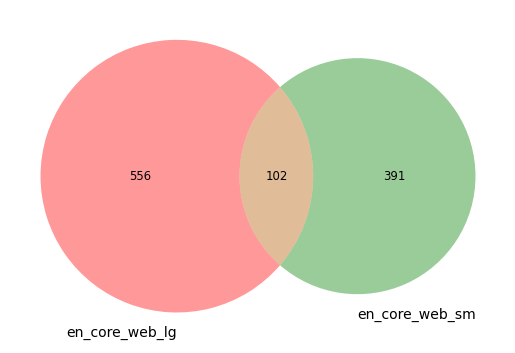

In [ ]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Define the two lists
list1 = non_empty_branches_lg
list2 = non_empty_branches_sm

# Create a Venn diagram
venn2(subsets=(len(list1), len(list2), len(set(list1).intersection(list2))),
      set_labels=('en_core_web_lg', 'en_core_web_sm'))

# Display the plot
plt.show()


In [ ]:
nlp2 = spacy.load("/content/drive/MyDrive/dataset/output/model-best")
doc11 = nlp2("Police office - Berri")

spacy.displacy.render(doc11, style="ent", jupyter=True)

In [ ]:
doc12 = nlp2("RSL Ardrossan Sub Branch")

spacy.displacy.render(doc12, style="ent", jupyter=True)

In [ ]:
doc13 = nlp2("Sunline Speedway")

spacy.displacy.render(doc13, style="ent", jupyter=True)

/usr/local/lib/python3.10/dist-packages/spacy/displacy/__init__.py:215: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


In [ ]:
df.columns

Index(['Organization Name', 'Internal Contact ID', 'Subject_id #1',
       'Subject_id #2', 'Subject_id #3', 'Subject_id #4', 'Subject_id #5',
       'Subject_id #6', 'Subject_id #7', 'Subject_id #8',
       ...
       'GT_summary', 'Comment', 'Services', 'Tag Line', 'Organisation Type',
       'Also Known As', 'Former Name', 'Acronym', 'Locations_sm',
       'Locations_lg'],
      dtype='object', length=102)

In [ ]:
def remove_gpes(text):
    doc = nlp2(text)
    filtered_tokens = [token.text for token in doc if token.ent_type_ != "CITY"]
    cleaned_text = " ".join(filtered_tokens)
    return cleaned_text

# Apply the 'remove_gpes' function to the 'text_column'
df['org_name_no_branch'] = df['Organization Name'].apply(remove_gpes)

# Display the DataFrame with cleaned text
print(df)

                                       Organization Name  Internal Contact ID  \
0                               RSL Ardrossan Sub Branch               193932   
1                               RSL Balaklava Sub Branch               193933   
2                                 RSL Barmera Sub Branch               193934   
3                                   RSL Berri Sub Branch               193935   
4                             RSL Blanchetown Sub Branch               193936   
...                                                  ...                  ...   
14342                Gerard Aboriginal Community Council               238387   
14343                       Adelaide Hills Garden Affair               238388   
14344  Anangu Pitjantjatjara Yankunytjatjara Communit...               238389   
14345              Karoonda Districts Football Club Inc.               238390   
14346                                     Kazoku Judokan               238393   

                   Subject_

In [ ]:
df_cleaned = df.drop_duplicates(subset='org_name_no_branch')

# Display the cleaned DataFrame
print(df_cleaned)

                                       Organization Name  Internal Contact ID  \
0                               RSL Ardrossan Sub Branch               193932   
7            RSL Brinkworth, Koolunga & Yacka Sub Branch               193940   
11                      RSL Coonawarra-Penola Sub Branch               193945   
36                      RSL Port Pirie & Military Museum               193975   
56                     Adelaide Turf Cricket Association               194001   
...                                                  ...                  ...   
14341                           Yalata Community Council               238386   
14342                Gerard Aboriginal Community Council               238387   
14343                       Adelaide Hills Garden Affair               238388   
14344  Anangu Pitjantjatjara Yankunytjatjara Communit...               238389   
14346                                     Kazoku Judokan               238393   

                   Subject_

In [ ]:
df_open  = df_cleaned[["Organization Name", "Internal Contact ID","Eligibility", "Fees", "Venue hire new", "Comment", "Services", "Tag Line" ]]
df_open = df_open.rename(columns={'Organization Name': 'names', 'Internal Contact ID': 'ids', 'Eligibility': 'audiences', 'Fees': 'fees' , 'Comment': 'comments' ,'Services': 'services' ,'Venue hire new':'venues', 'Tag Line': 'taglines'})
df_open

,names,ids,audiences,fees,venues,comments,services,taglines
0,RSL Ardrossan Sub Branch,193932,Serving and ex-service men and women and their...,NaN,Hall/Clubrooms for hire,NaN,Welfare and pensions support for ex-servicemen...,NaN
7,"RSL Brinkworth, Koolunga & Yacka Sub Branch",193940,Serving and ex-service men and women and their...,NaN,NaN,We welcome former and serving Defence members ...,Welfare and pensions support for ex-servicemen...,NaN
11,RSL Coonawarra-Penola Sub Branch,193945,Serving and ex-service men and women and their...,NaN,NaN,NaN,Welfare and pensions support for ex-servicemen...,NaN
36,RSL Port Pirie & Military Museum,193975,Serving and ex-service men and women and their...,NaN,Hall/Clubroom,NaN,Welfare and pensions support for ex-servicemen...,NaN
56,Adelaide Turf Cricket Association,194001,NaN,NaN,NaN,NaN,Coordination & promotion of community turf cri...,NaN
...,...,...,...,...,...,...,...,...
14341,Yalata Community Council,238386,NaN,NaN,NaN,NaN,Municipal services\nGeneral Store – Owned and ...,NaN
14342,Gerard Aboriginal Community Council,238387,NaN,NaN,NaN,NaN,Municipal services,NaN
14343,Adelaide Hills Garden Affair,238388,NaN,Tickets available from 1 Dec 2023. All ticket...,NaN,"Stalls, speakers, demonstrations, children's a...",NaN,An event for the love of gardening
14344,Anangu Pitjantjatjara Yankunytjatjara Communit...,238389,NaN,NaN,NaN,NaN,Municipal services\nOversees the activities of...,NaN


In [ ]:
columns_to_drop = ["Eligibility", "Fees", "Venue hire new", "Comment", "Services", "Tag Line", "GT_summary"] # and GY_summary
df_closed = df_cleaned.drop(columns=columns_to_drop)
df_closed = df_closed.rename(columns={'Organization Name': 'names', 'Internal Contact ID': 'ids', 'Eligibility': 'audience', 'Fees': 'fees' , 'Comment': 'comments' ,'Venue hire new':'venue', 'Tag Line': 'taglines'})

df_closed

,names,ids,Subject_id #1,Subject_id #2,Subject_id #3,Subject_id #4,Subject_id #5,Subject_id #6,Subject_id #7,Subject_id #8,...,Subject_id #85,Subject_id #86,clean_cities,Organisation Type,Also Known As,Former Name,Acronym,Locations_sm,Locations_lg,org_name_no_branch
0,RSL Ardrossan Sub Branch,193932,Ex-Defence Service Groups,Halls For Hire,Social & Activity Groups,Support & Resource Groups,Veterans,NaN,NaN,NaN,...,NaN,NaN,ardrossan,Community,Ardrossan RSL,NaN,NaN,[],[],RSL Sub Branch
7,"RSL Brinkworth, Koolunga & Yacka Sub Branch",193940,Ex-Defence Service Groups,Social & Activity Groups,Support & Resource Groups,Veterans,NaN,NaN,NaN,NaN,...,NaN,NaN,brinkworth,Community,Brinkworth RSL,NaN,NaN,[],[],"RSL Brinkworth , & Yacka Sub Branch"
11,RSL Coonawarra-Penola Sub Branch,193945,Social & Activity Groups,Support & Resource Groups,Veterans,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,penola,Community,Coonawarra RSL,NaN,NaN,[],[],RSL Coonawarra - Sub Branch
36,RSL Port Pirie & Military Museum,193975,Museums,Social & Activity Groups,Support & Resource Groups,Veterans,NaN,NaN,NaN,NaN,...,NaN,NaN,port pirie west,Community,Port Pirie RSL,NaN,NaN,[],[],RSL & Military Museum
56,Adelaide Turf Cricket Association,194001,Cricket,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,north adelaide,Community,"Turf Cricket Association, Adelaide",NaN,ATCA,[],[],Turf Cricket Association
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14341,Yalata Community Council,238386,Local Government,Councils,Aboriginal People,Indigenous People,NaN,NaN,NaN,NaN,...,NaN,NaN,yalata,Government,YALATA ANANGU ABORIGINAL CORPORATION,NaN,NaN,[],[],Community Council
14342,Gerard Aboriginal Community Council,238387,Local Government,Councils,Aboriginal People,Indigenous People,NaN,NaN,NaN,NaN,...,NaN,NaN,gerard,Government,GERARD COMMUNITY COUNCIL ABORIGINAL CORPORATION,NaN,NaN,[],[],Aboriginal Community Council
14343,Adelaide Hills Garden Affair,238388,Garden Appreciation,Gardening,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,aldgate,Government,NaN,NaN,NaN,[Adelaide Hills Garden Affair],[],Garden Affair
14344,Anangu Pitjantjatjara Yankunytjatjara Communit...,238389,Local Government,Councils,Aboriginal People,Indigenous People,NaN,NaN,NaN,NaN,...,NaN,NaN,umuwa,Government,APY Lands,NaN,APY,[],[],Yankunytjatjara Community Council


In [ ]:
df_open.to_csv("df_open_ready4EDA.csv")

In [ ]:
df_closed.to_csv("df_closed_ready4EDA.csv")

# EDA

## Open Fields:
audiences, fees, venues, comments, services, taglines

In [ ]:
df_open = pd.read_csv("/content/drive/MyDrive/dataset/df_open_ready4EDA.csv", index_col=0)
df_open

,names,ids,audiences,fees,venues,comments,services,taglines
0,RSL Ardrossan Sub Branch,193932,Serving and ex-service men and women and their...,NaN,Hall/Clubrooms for hire,NaN,Welfare and pensions support for ex-servicemen...,NaN
7,"RSL Brinkworth, Koolunga & Yacka Sub Branch",193940,Serving and ex-service men and women and their...,NaN,NaN,We welcome former and serving Defence members ...,Welfare and pensions support for ex-servicemen...,NaN
11,RSL Coonawarra-Penola Sub Branch,193945,Serving and ex-service men and women and their...,NaN,NaN,NaN,Welfare and pensions support for ex-servicemen...,NaN
36,RSL Port Pirie & Military Museum,193975,Serving and ex-service men and women and their...,NaN,Hall/Clubroom,NaN,Welfare and pensions support for ex-servicemen...,NaN
56,Adelaide Turf Cricket Association,194001,NaN,NaN,NaN,NaN,Coordination & promotion of community turf cri...,NaN
...,...,...,...,...,...,...,...,...
14341,Yalata Community Council,238386,NaN,NaN,NaN,NaN,Municipal services\nGeneral Store – Owned and ...,NaN
14342,Gerard Aboriginal Community Council,238387,NaN,NaN,NaN,NaN,Municipal services,NaN
14343,Adelaide Hills Garden Affair,238388,NaN,Tickets available from 1 Dec 2023. All ticket...,NaN,"Stalls, speakers, demonstrations, children's a...",NaN,An event for the love of gardening
14344,Anangu Pitjantjatjara Yankunytjatjara Communit...,238389,NaN,NaN,NaN,NaN,Municipal services\nOversees the activities of...,NaN


In [ ]:
df_open

,names,ids,audiences,fees,venues,comments,services,taglines
0,RSL Ardrossan Sub Branch,193932,Serving and ex-service men and women and their...,NaN,Hall/Clubrooms for hire,NaN,Welfare and pensions support for ex-servicemen...,NaN
7,"RSL Brinkworth, Koolunga & Yacka Sub Branch",193940,Serving and ex-service men and women and their...,NaN,NaN,We welcome former and serving Defence members ...,Welfare and pensions support for ex-servicemen...,NaN
11,RSL Coonawarra-Penola Sub Branch,193945,Serving and ex-service men and women and their...,NaN,NaN,NaN,Welfare and pensions support for ex-servicemen...,NaN
36,RSL Port Pirie & Military Museum,193975,Serving and ex-service men and women and their...,NaN,Hall/Clubroom,NaN,Welfare and pensions support for ex-servicemen...,NaN
56,Adelaide Turf Cricket Association,194001,NaN,NaN,NaN,NaN,Coordination & promotion of community turf cri...,NaN
...,...,...,...,...,...,...,...,...
14341,Yalata Community Council,238386,NaN,NaN,NaN,NaN,Municipal services\nGeneral Store – Owned and ...,NaN
14342,Gerard Aboriginal Community Council,238387,NaN,NaN,NaN,NaN,Municipal services,NaN
14343,Adelaide Hills Garden Affair,238388,NaN,Tickets available from 1 Dec 2023. All ticket...,NaN,"Stalls, speakers, demonstrations, children's a...",NaN,An event for the love of gardening
14344,Anangu Pitjantjatjara Yankunytjatjara Communit...,238389,NaN,NaN,NaN,NaN,Municipal services\nOversees the activities of...,NaN


In [ ]:
#datatype

df_open.dtypes

names        object
ids           int64
audiences    object
fees         object
venues       object
comments     object
services     object
taglines     object
dtype: object

In [ ]:
#missing value

df_open.isna().sum() / df_open.shape[0]

names        0.000000
ids          0.000000
audiences    0.686393
fees         0.620836
venues       0.920742
comments     0.584692
services     0.008977
taglines     0.795889
dtype: float64

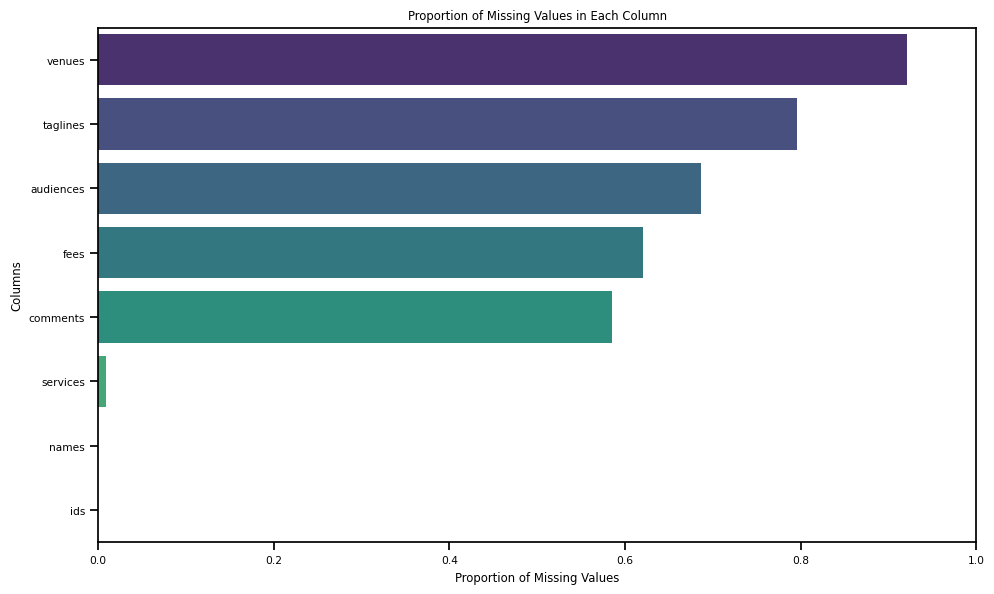

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns


# Calculate the proportion of missing values for each column
missing_proportions = df_open.isna().sum() / df_open.shape[0]

# Sort columns by missing proportion in descending order
sorted_columns = missing_proportions.sort_values(ascending=False).index

# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Create a bar plot using seaborn
sns.barplot(x=missing_proportions[sorted_columns], y=sorted_columns, palette='viridis')

# Customize the plot
plt.title("Proportion of Missing Values in Each Column")
plt.xlabel("Proportion of Missing Values")
plt.ylabel("Columns")
plt.xlim(0, 1)  # Set x-axis limit between 0 and 1
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
def count_words(sentence):
    # Split the sentence into words
    words = sentence.split()

    # Count the number of words
    word_count = len(words)

    return word_count

In [ ]:
def calculate_word_count_and_length(df, column_name, word_count_prefix, length_prefix):
    word_count_column = word_count_prefix + column_name
    length_column = length_prefix + column_name

    df[word_count_column] = df[column_name].apply(lambda x: len(str(x).split()))
    df[length_column] = df[column_name].apply(lambda x: len(str(x)))



In [ ]:
# Apply the function to calculate word count and length for specified columns
calculate_word_count_and_length(df_open, "audiences", "wc_", "len_")
calculate_word_count_and_length(df_open, "fees", "wc_", "len_")
calculate_word_count_and_length(df_open, "venues", "wc_", "len_")
calculate_word_count_and_length(df_open, "comments", "wc_", "len_")
calculate_word_count_and_length(df_open, "services", "wc_", "len_")
calculate_word_count_and_length(df_open, "taglines", "wc_", "len_")



In [ ]:
df_open


,names,ids,audiences,fees,venues,comments,services,taglines,wc_audiences,len_audiences,wc_fees,len_fees,wc_venues,len_venues,wc_comments,len_comments,wc_services,len_services,wc_taglines,len_taglines
0,RSL Ardrossan Sub Branch,193932,Serving and ex-service men and women and their...,NaN,Hall/Clubrooms for hire,NaN,Welfare and pensions support for ex-servicemen...,NaN,9,57,1,3,3,23,1,3,24,183,1,3
7,"RSL Brinkworth, Koolunga & Yacka Sub Branch",193940,Serving and ex-service men and women and their...,NaN,NaN,We welcome former and serving Defence members ...,Welfare and pensions support for ex-servicemen...,NaN,9,57,1,3,1,3,18,115,24,183,1,3
11,RSL Coonawarra-Penola Sub Branch,193945,Serving and ex-service men and women and their...,NaN,NaN,NaN,Welfare and pensions support for ex-servicemen...,NaN,9,57,1,3,1,3,1,3,24,183,1,3
36,RSL Port Pirie & Military Museum,193975,Serving and ex-service men and women and their...,NaN,Hall/Clubroom,NaN,Welfare and pensions support for ex-servicemen...,NaN,9,58,1,3,1,13,1,3,26,199,1,3
56,Adelaide Turf Cricket Association,194001,NaN,NaN,NaN,NaN,Coordination & promotion of community turf cri...,NaN,1,3,1,3,1,3,1,3,16,112,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14341,Yalata Community Council,238386,NaN,NaN,NaN,NaN,Municipal services\nGeneral Store – Owned and ...,NaN,1,3,1,3,1,3,1,3,50,319,1,3
14342,Gerard Aboriginal Community Council,238387,NaN,NaN,NaN,NaN,Municipal services,NaN,1,3,1,3,1,3,1,3,2,18,1,3
14343,Adelaide Hills Garden Affair,238388,NaN,Tickets available from 1 Dec 2023. All ticket...,NaN,"Stalls, speakers, demonstrations, children's a...",NaN,An event for the love of gardening,1,3,13,76,1,3,7,65,1,3,7,34
14344,Anangu Pitjantjatjara Yankunytjatjara Communit...,238389,NaN,NaN,NaN,NaN,Municipal services\nOversees the activities of...,NaN,1,3,1,3,1,3,1,3,37,274,1,3


In [ ]:
#df_open["wc_audiences1"] = [len(str(i).split()) for i in df_open["audiences"]]
#df_open["len_audiences1"] = [len(str(i)) for i in df_open["audiences"]]

In [ ]:
#df_open["wc_fees1"] = [len(str(i).split()) for i in df_open["fees"]]
#df_open["len_fee1"] = [len(str(i)) for i in df_open["fees"]]

In [ ]:
#df_open["wc_venues1"] = [len(str(i).split()) for i in df_open["venues"]]
#df_open["len_venues1"] = [len(str(i)) for i in df_open["venues"]]

In [ ]:
#df_open["wc_comments1"] = [len(str(i).split()) for i in df_open["comments"]]
#df_open["len_comments1"] = [len(str(i)) for i in df_open["comments"]]

In [ ]:
#df_open["wc_services1"] = [len(str(i).split()) for i in df_open["services"]]
#df_open["len_services1"] = [len(str(i)) for i in df_open["services"]]

In [ ]:
#df_open["wc_taglines1"] = [len(str(i).split()) for i in df_open["taglines"]]
#df_open["len_taglines1"] = [len(str(i)) for i in df_open["taglines"]]

In [ ]:
df_open.describe()

,ids,wc_audiences,len_audiences,wc_fees,len_fees,wc_venues,len_venues,wc_comments,len_comments,wc_services,len_services,wc_taglines,len_taglines
count,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000,8466.000000
mean,208579.494212,4.474604,25.593078,2.372785,13.268368,2.193244,11.506378,13.268013,86.562013,20.324947,142.129931,2.088944,11.240491
std,12593.914292,8.374779,54.054608,3.220458,22.322096,6.191584,43.783239,21.703704,145.520126,26.448941,180.556048,2.715144,19.488541
min,193932.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,1.000000
25%,199345.500000,1.000000,3.000000,1.000000,3.000000,1.000000,3.000000,1.000000,3.000000,6.000000,42.000000,1.000000,3.000000
50%,204301.000000,1.000000,3.000000,1.000000,3.000000,1.000000,3.000000,1.000000,3.000000,13.000000,90.000000,1.000000,3.000000
75%,214216.000000,4.000000,24.000000,2.000000,14.000000,1.000000,3.000000,20.000000,133.000000,25.000000,175.000000,1.000000,3.000000
max,238393.000000,113.000000,765.000000,48.000000,322.000000,121.000000,871.000000,314.000000,2124.000000,969.000000,5722.000000,20.000000,100.000000


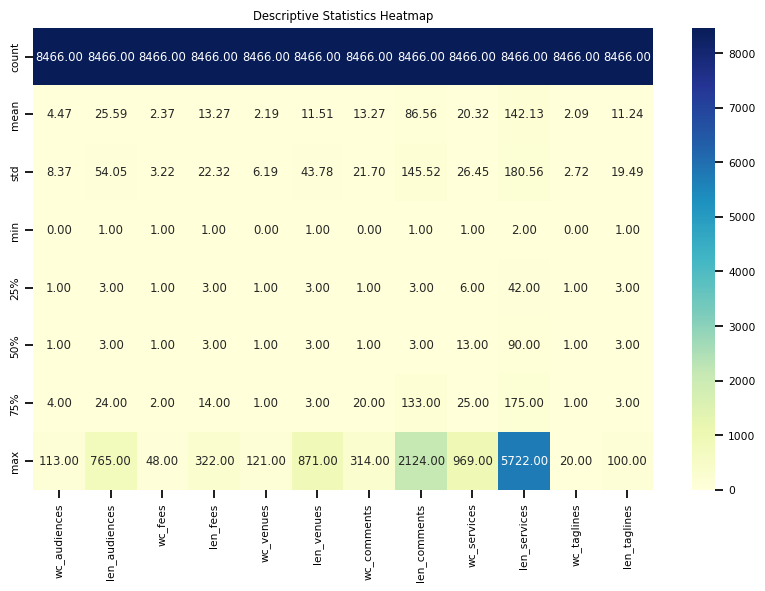

In [ ]:
# Drop the 'id' column
df_open_cp = df_open.copy()
df_open_cp = df_open_cp.drop(columns=['ids'])


# Set the context for plotting with automatic font scaling
sns.set_context("notebook", font_scale=0.7)

# Generate the descriptive statistics
statistics = df_open_cp.describe()



# Create a heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(statistics, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Descriptive Statistics Heatmap")
plt.show()

In [ ]:
# df_open[['wc_services', 'wc_services1']].describe() # check

In [ ]:
# df_open[['len_comments', 'len_comments1']].describe() # check

## Remove Outliers by IDs (extremely short info @ service + audience)

### Service:
short info such as .., NaN, legacy

In [ ]:
def remove_row_by_id(data, list_ids):
    data = data.drop(data[data['ids'].isin(list_ids)].index)
    return data

In [ ]:
# List of IDs to be removed
dotdot_id = df_open[(df_open['len_services'] == 2)]["ids"].to_list()
NaN_id = df_open[(df_open['len_services'] == 3)]["ids"].to_list()
legacy_id = [205559, 206570]
ids_to_remove = dotdot_id + NaN_id + legacy_id
print(ids_to_remove)
print(len(ids_to_remove))

# Remove rows with IDs in the list
df_clean_open = remove_row_by_id(df_open, ids_to_remove)

# Print updated DataFrame
df_clean_open

[235338, 194099, 194210, 194226, 194233, 194271, 194303, 195419, 196341, 196475, 196739, 197598, 198464, 198919, 198977, 199797, 200792, 200898, 201003, 201030, 202254, 202313, 202724, 202812, 203289, 204674, 206190, 206671, 206888, 207378, 207477, 207642, 211022, 212226, 212694, 215041, 218163, 218164, 218186, 218190, 218615, 218666, 219000, 220729, 223851, 224159, 225288, 226549, 227002, 227277, 227305, 227335, 227343, 227395, 227405, 227495, 227908, 227966, 230346, 230798, 231020, 231173, 231190, 231479, 233793, 235516, 235962, 237822, 238044, 238129, 238251, 238298, 238307, 238309, 238310, 238336, 238388, 205559, 206570]
79


,names,ids,audiences,fees,venues,comments,services,taglines,wc_audiences,len_audiences,wc_fees,len_fees,wc_venues,len_venues,wc_comments,len_comments,wc_services,len_services,wc_taglines,len_taglines
0,RSL Ardrossan Sub Branch,193932,Serving and ex-service men and women and their...,NaN,Hall/Clubrooms for hire,NaN,Welfare and pensions support for ex-servicemen...,NaN,9,57,1,3,3,23,1,3,24,183,1,3
7,"RSL Brinkworth, Koolunga & Yacka Sub Branch",193940,Serving and ex-service men and women and their...,NaN,NaN,We welcome former and serving Defence members ...,Welfare and pensions support for ex-servicemen...,NaN,9,57,1,3,1,3,18,115,24,183,1,3
11,RSL Coonawarra-Penola Sub Branch,193945,Serving and ex-service men and women and their...,NaN,NaN,NaN,Welfare and pensions support for ex-servicemen...,NaN,9,57,1,3,1,3,1,3,24,183,1,3
36,RSL Port Pirie & Military Museum,193975,Serving and ex-service men and women and their...,NaN,Hall/Clubroom,NaN,Welfare and pensions support for ex-servicemen...,NaN,9,58,1,3,1,13,1,3,26,199,1,3
56,Adelaide Turf Cricket Association,194001,NaN,NaN,NaN,NaN,Coordination & promotion of community turf cri...,NaN,1,3,1,3,1,3,1,3,16,112,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14340,Nipapanha Community Aboriginal Corporation,238383,NaN,NaN,NaN,NaN,"Municipal Services, including rubbish collecti...",NaN,1,3,1,3,1,3,1,3,31,227,1,3
14341,Yalata Community Council,238386,NaN,NaN,NaN,NaN,Municipal services\nGeneral Store – Owned and ...,NaN,1,3,1,3,1,3,1,3,50,319,1,3
14342,Gerard Aboriginal Community Council,238387,NaN,NaN,NaN,NaN,Municipal services,NaN,1,3,1,3,1,3,1,3,2,18,1,3
14344,Anangu Pitjantjatjara Yankunytjatjara Communit...,238389,NaN,NaN,NaN,NaN,Municipal services\nOversees the activities of...,NaN,1,3,1,3,1,3,1,3,37,274,1,3


In [ ]:
df_clean_open.describe()

,ids,wc_audiences,len_audiences,wc_fees,len_fees,wc_venues,len_venues,wc_comments,len_comments,wc_services,len_services,wc_taglines,len_taglines
count,8387.000000,8387.000000,8387.000000,8387.000000,8387.000000,8387.000000,8387.000000,8387.000000,8387.000000,8387.000000,8387.000000,8387.000000,8387.000000
mean,208504.826517,4.503637,25.780494,2.381424,13.337665,2.187314,11.463575,13.254441,86.455824,20.354119,142.487779,2.088947,11.249076
std,12544.231683,8.406361,54.254089,3.229825,22.391982,6.155826,43.486811,21.659560,145.214790,24.187439,168.743897,2.714573,19.503278
min,193932.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,4.000000,0.000000,1.000000
25%,199323.000000,1.000000,3.000000,1.000000,3.000000,1.000000,3.000000,1.000000,3.000000,6.000000,43.000000,1.000000,3.000000
50%,204254.000000,1.000000,3.000000,1.000000,3.000000,1.000000,3.000000,1.000000,3.000000,13.000000,91.000000,1.000000,3.000000
75%,214032.500000,5.000000,24.000000,2.000000,14.000000,1.000000,3.000000,20.000000,133.000000,25.000000,177.000000,1.000000,3.000000
max,238393.000000,113.000000,765.000000,48.000000,322.000000,121.000000,871.000000,314.000000,2124.000000,350.000000,2351.000000,20.000000,100.000000


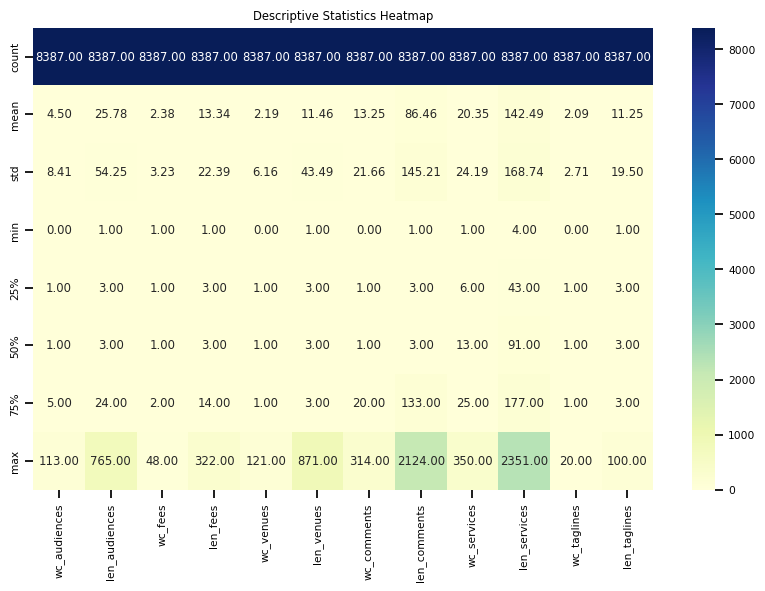

In [ ]:
# Drop the 'id' column
df_clean_open_cp = df_clean_open.copy()
df_clean_open_cp = df_clean_open.drop(columns=['ids'])


# Set the context for plotting with automatic font scaling
sns.set_context("notebook", font_scale=0.7)

# Generate the descriptive statistics
statistics = df_clean_open_cp.describe()



# Create a heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(statistics, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Descriptive Statistics Heatmap")
plt.show()

|service entity| # of records| distribution| handle|
|----|-----|----|----|
|3 - 39|3616| under 25%| manual|
|long|10682| over | algo|

In [ ]:
manual_df = df_clean_open[(df_clean_open["len_services"] > 3) & (df_clean_open["len_services"] <= 39)] #need to cater manually
manual_df

,names,ids,audiences,fees,venues,comments,services,taglines,wc_audiences,len_audiences,wc_fees,len_fees,wc_venues,len_venues,wc_comments,len_comments,wc_services,len_services,wc_taglines,len_taglines
140,Adelaide City Women's Football Club,194089,Women and girls - under 9 to open age teams,Membership fee,NaN,NaN,Football (soccer),Adelaide City Women's Football Club,10,43,2,14,1,3,1,3,2,17,5,35
141,Cadell Pistol Club,194091,NaN,NaN,NaN,All Visitors Welcome,Pistol club,NaN,1,3,1,3,1,3,3,20,2,11,1,3
143,St John Ambulance Australia SA Inc. - Waikerie,194096,NaN,NaN,Hall hire,NaN,First Aid Skills,NaN,1,3,1,3,2,9,1,3,3,16,1,3
147,Waikerie Catholic Church,194101,NaN,NaN,NaN,NaN,Church service,NaN,1,3,1,3,1,3,1,3,2,14,1,3
149,Waikerie Ramco Cricket Club,194106,NaN,NaN,NaN,NaN,Cricket Club,NaN,1,3,1,3,1,3,1,3,2,13,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14320,Loxton Pistol Club Inc,238291,NaN,NaN,NaN,The Loxton Pistol Club is affiliated with SARPA,Target Shooting\nShooting,Pistol target shooting,1,3,1,3,1,3,8,47,3,24,3,22
14328,Adelaide Vocal Union,238318,Curious men who can sing in tune and learn a p...,NaN,NaN,We are a group of around 20 men who enjoy the ...,Singing\nPerformances,Male Four Part Harmony Ensemble who love to si...,50,265,1,3,1,3,29,148,2,20,11,60
14334,Haven Port Pirie,238366,NaN,NaN,NaN,The Haven is a free and confidential service p...,Community Centre,"A safe place to receive information, referrals...",1,3,1,3,1,3,17,97,2,16,11,69
14342,Gerard Aboriginal Community Council,238387,NaN,NaN,NaN,NaN,Municipal services,NaN,1,3,1,3,1,3,1,3,2,18,1,3


In [ ]:
df_sum_open = df_clean_open[(df_clean_open["len_services"] > 39) ]

In [ ]:
df_sum_open.describe()

,ids,wc_audiences,len_audiences,wc_fees,len_fees,wc_venues,len_venues,wc_comments,len_comments,wc_services,len_services,wc_taglines,len_taglines
count,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000,6495.000000
mean,207916.665743,5.053580,29.539954,2.508545,14.340570,2.242956,11.870054,14.143187,92.848653,25.307467,177.337490,2.170131,11.879600
std,12269.880187,9.109803,58.897461,3.405581,23.784303,6.345492,45.005469,22.099785,148.484481,25.415152,177.080562,2.815467,20.340389
min,193932.000000,0.000000,1.000000,1.000000,2.000000,0.000000,1.000000,0.000000,1.000000,4.000000,40.000000,0.000000,1.000000
25%,199333.500000,1.000000,3.000000,1.000000,3.000000,1.000000,3.000000,1.000000,3.000000,10.000000,73.000000,1.000000,3.000000
50%,203389.000000,1.000000,3.000000,1.000000,3.000000,1.000000,3.000000,1.000000,3.000000,18.000000,123.000000,1.000000,3.000000
75%,212923.500000,6.000000,30.000000,2.000000,14.000000,1.000000,3.000000,22.000000,147.000000,30.000000,211.000000,1.000000,3.000000
max,238389.000000,113.000000,765.000000,48.000000,322.000000,121.000000,871.000000,314.000000,2124.000000,350.000000,2351.000000,20.000000,100.000000


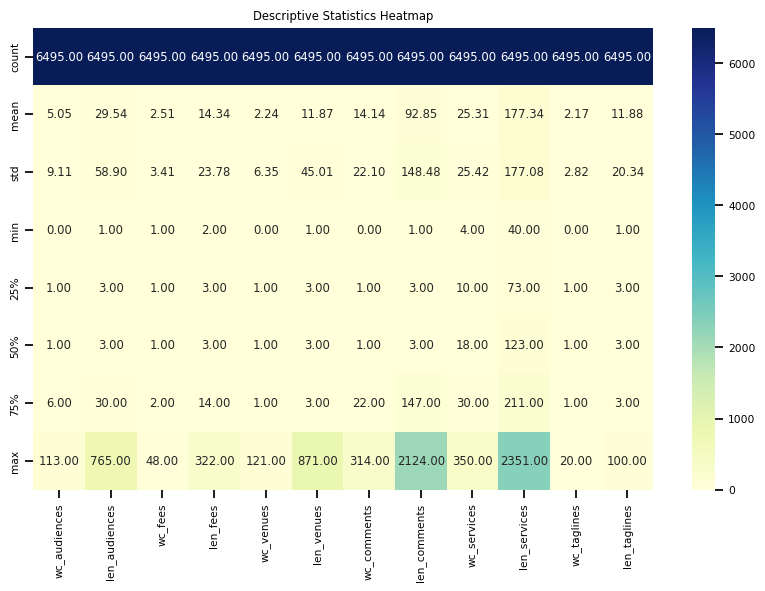

In [ ]:
# Drop the 'id' column
df_sum_open_cp = df_sum_open.copy()
df_sum_open_cp = df_sum_open.drop(columns=['ids'])

# Set the context for plotting with automatic font scaling
sns.set_context("notebook", font_scale=0.7)

# Generate the descriptive statistics
statistics = df_sum_open_cp.describe()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(statistics, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Descriptive Statistics Heatmap")
plt.show()

In [ ]:
summary_id = df_sum_open['ids'].to_list()

with open('summary_id.txt', 'w') as file:
    for item in summary_id:
        file.write(str(item) + '\n')

In [ ]:
df_GT = pd.read_excel('/content/drive/MyDrive/dataset/GT.xlsx')
list_GT_id = df_GT[df_GT['GT_summary'].notna()]['Internal Contact ID'].to_list()
list_GT_id #1079

[193932,
 193933,
 193934,
 193935,
 193936,
 193938,
 193939,
 193940,
 193942,
 193943,
 193944,
 193945,
 193946,
 193947,
 193948,
 193949,
 193950,
 193951,
 193952,
 193953,
 193955,
 193956,
 193957,
 193959,
 193960,
 193961,
 193963,
 193964,
 193965,
 193966,
 193968,
 193970,
 193971,
 193972,
 193973,
 193974,
 193975,
 193976,
 193977,
 193978,
 193979,
 193980,
 193981,
 193982,
 193984,
 193985,
 193986,
 193987,
 193988,
 193989,
 193990,
 193992,
 193994,
 193996,
 193998,
 193999,
 194004,
 194035,
 194049,
 194063,
 194086,
 194088,
 194158,
 194171,
 194217,
 194245,
 194247,
 194261,
 194281,
 194301,
 194340,
 194367,
 194370,
 194374,
 194390,
 194404,
 194468,
 194469,
 194471,
 194472,
 194480,
 194498,
 194499,
 194500,
 194502,
 194508,
 194533,
 194543,
 194544,
 194545,
 194548,
 194550,
 194605,
 194643,
 194644,
 194870,
 194874,
 194881,
 194892,
 194894,
 194908,
 194910,
 194914,
 194919,
 194943,
 194945,
 194953,
 194954,
 194956,
 194958,
 194968,
 

In [ ]:
list_open_id = df_sum_open['ids'].to_list()
list_open_id

[193932,
 193940,
 193945,
 193975,
 194001,
 194002,
 194003,
 194004,
 194005,
 194006,
 194007,
 194008,
 194009,
 194010,
 194011,
 194012,
 194013,
 194014,
 194015,
 194016,
 194017,
 194018,
 194019,
 194020,
 194021,
 194022,
 194023,
 194024,
 194025,
 194026,
 194027,
 194028,
 194029,
 194031,
 194032,
 194033,
 194034,
 194035,
 194037,
 194038,
 194039,
 194040,
 194041,
 194042,
 194043,
 194044,
 194046,
 194047,
 194048,
 194049,
 194050,
 194051,
 194052,
 194053,
 194054,
 194055,
 194057,
 194058,
 194059,
 194060,
 194062,
 194063,
 194064,
 194065,
 194066,
 194067,
 194068,
 194069,
 194070,
 194071,
 194072,
 194073,
 194074,
 194076,
 194077,
 194078,
 194079,
 194080,
 194082,
 194083,
 194084,
 194085,
 194086,
 194087,
 194093,
 194098,
 194100,
 194103,
 194112,
 194113,
 194114,
 194118,
 194119,
 194123,
 194124,
 194126,
 194130,
 194141,
 194143,
 194146,
 194147,
 194148,
 194150,
 194156,
 194158,
 194159,
 194161,
 194162,
 194164,
 194165,
 194170,
 

In [ ]:

set_open_id = set(list_open_id)

# Check if IDs from list_GT_id are in set_open_id
matching_ids = [id for id in list_GT_id if id in set_open_id]

# Print the matching IDs
print(matching_ids)
print(len(matching_ids))
with open('matching_ids.txt', 'w') as file:
    for item in matching_ids:
        file.write(str(item) + '\n')

[193932, 193940, 193945, 193975, 194004, 194035, 194049, 194063, 194086, 194158, 194171, 194247, 194281, 194301, 194367, 194374, 194404, 194472, 194498, 194508, 194533, 194543, 194544, 194605, 194870, 194881, 194945, 194956, 194958, 194968, 194971, 194975, 194977, 194991, 194992, 195013, 195015, 195019, 195032, 195037, 195078, 195097, 195107, 195111, 195112, 195127, 195129, 195189, 195217, 195225, 195240, 195247, 195252, 195319, 195349, 195353, 195357, 195364, 195380, 195385, 195397, 195448, 195457, 195458, 195460, 195517, 195522, 195531, 195563, 195595, 195597, 195622, 195628, 195633, 195648, 195659, 195689, 195690, 195709, 195718, 195721, 195754, 195795, 195797, 195803, 195812, 195846, 195895, 195905, 195918, 195920, 195932, 195944, 195948, 195950, 195951, 195962, 195992, 196003, 196007, 196050, 196055, 196107, 196110, 196175, 196176, 196183, 196204, 196207, 196237, 196243, 196268, 196272, 196313, 196319, 196322, 196340, 196365, 196404, 196447, 196494, 196495, 196500, 196507, 196537,

### Audience:


In [ ]:
df_clean_open[(df_clean_open['len_audiences'] <= 3)]['audiences'].unique() #[nan, 'Men', '18+', [nan, ' ', 'Men', '18+' ]
df_clean_open[df_clean_open['audiences'] == "Men"] #7
df_clean_open[df_clean_open['audiences'] == "18+"] #1 #suitable for individuals who are 18 years or older
df_clean_open['audiences'].isna().sum() #9938


5738

# Data Cleansing / Preprocessing


In [ ]:
def text_preprocessing(text):
    if isinstance(text, str):

        # Replace audience '18+'
        text = text.replace("18+", "individuals who are 18 years or older")

        # Replace 'é' with 'e' #for words like cafe
        text = text.replace("é", "e")

        # Replace HTML
        text = text.replace("&nbsp", " ")
        text = text.replace("&lt", "<")
        text = text.replace("&gt", ">")
        text = text.replace("&amp", "&")
        text = text.replace("&quot", "'")
        text = text.replace("&rsquo;s", "'s")

        # Replace '&' with 'and'
        text = text.replace("&", "and")

        # Remove spaces
        text = text.replace("\r\n", " ")

        # Remove the time pattern
        text = re.sub(r"Mon - Fri \d{1,2}\.\d{2}[ap]m - \d{1,2}\.\d{2}[ap]m|\bMon - Fri \d{1,2}\.\d{2}[ap]m - \d{1,2}[ap]m\b", "", text)

        # Extract the important text
        text = re.sub(r"<[^>]+>", "", text)

        # Convert to lowercase
        text = text.lower()

        # Remove special characters
        text = re.sub(r"[^a-zA-Z0-9\s]", "", text)

        # Remove tel pattern
        text = re.sub(r"tel\s+\d{4}\s+\d{4}", "", text)
        text = re.sub(r"tel\s+\d{4}(?:\s+\d{3}){0,2}", "", text)
        text = re.sub(r"\b\d{4}(?:\s+\d{3}){2}\b", "", text)

        # Remove extra spaces
        text = re.sub(r'\s+', ' ', text)

    return text

In [ ]:
df_try = df_sum_open.copy()
df_try['services'][5188]

'Policy development and research on issues relating to homelessness\nAdvocacy on behalf of homeless people\nPublic education about homelessness\nYouth Gateway: Trace-A-Place (for young people, 12-25 who are homeless or at risk of becoming homeless) 1800 807 364\nDomestic and Aboriginal Family Violence Gateway: 1800 800 098\n\n'

In [ ]:
df_try['clean_services'] = df_try['services'].apply(text_preprocessing)
df_try['clean_services'][5188]

'policy development and research on issues relating to homelessness advocacy on behalf of homeless people public education about homelessness youth gateway traceaplace for young people 1225 who are homeless or at risk of becoming homeless domestic and aboriginal family violence gateway '

In [ ]:
df_try['clean_taglines'] = df_try['taglines'].apply(text_preprocessing)

In [ ]:
df_try['comments'][5188]

'HomelessnessSA is a statewide organisation that has a growing membership, including a wide range of organisations, services, and individuals who have an interest in homelessness.  HomelessnessSA seeks to be inclusive, and encourages the participation of people who have experienced homelessness.  HomelessnessSA invites everyone  with skills, knowledge or interest  in the area to join together to work on the broader issues that are intertwined with homelessness.'

In [ ]:
df_try['clean_comments'] = df_try['comments'].apply(text_preprocessing)
df_try['clean_comments'][5188]

'homelessnesssa is a statewide organisation that has a growing membership including a wide range of organisations services and individuals who have an interest in homelessness homelessnesssa seeks to be inclusive and encourages the participation of people who have experienced homelessness homelessnesssa invites everyone with skills knowledge or interest in the area to join together to work on the broader issues that are intertwined with homelessness'

In [ ]:
df_try['venues'][54]

'Hall/Clubrooms'

In [ ]:
df_try['clean_venues'] = df_try['venues'].apply(text_preprocessing)
df_try['clean_venues'][54]

'hallclubrooms'

In [ ]:
df_try['fees'][54]

'Annual membership fee'

In [ ]:
df_try['clean_fees'] = df_try['fees'].apply(text_preprocessing)
df_try['clean_fees'][54]

'annual membership fee'

In [ ]:
df_try['audiences'][14000]

'Relatives, families and friends of alcoholics'

In [ ]:
df_try['clean_audiences'] = df_try['audiences'].apply(text_preprocessing)
df_try['clean_audiences'][14000]

'relatives families and friends of alcoholics'

## export clean only

In [ ]:
ids_list = df_try['ids'].values.tolist()
len(ids_list)

10624

In [ ]:
df_try_closed = df_closed[df_closed['ids'].isin(ids_list)]
len(df_try_closed)

10624

In [ ]:
df_try_closed.to_csv('working_closed_fields.csv', index=False)

In [ ]:
df_try.columns

Index(['names', 'ids', 'audiences', 'fees', 'venues', 'comments', 'services',
       'taglines', 'wc_audiences', 'len_audiences', 'wc_fees', 'len_fees',
       'wc_venues', 'len_venues', 'wc_comments', 'len_comments', 'wc_services',
       'len_services', 'wc_taglines', 'len_taglines', 'clean_services',
       'clean_taglines', 'clean_comments', 'clean_venues', 'clean_fees',
       'clean_audiences'],
      dtype='object')

In [ ]:
open_clean_to_export = ['names', 'ids', 'clean_audiences', 'clean_fees', 'clean_venues', 'clean_comments', 'clean_services', 'clean_taglines']
df_try_clean = df_try[open_clean_to_export]
df_try_clean.to_csv('working_open_fields.csv', index=False)

In [ ]:
calculate_word_count_and_length(df_try_clean, "clean_services", "wc_", "len_") #just for checking

<ipython-input-334-5e255c97fcf2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[word_count_column] = df[column_name].apply(lambda x: len(str(x).split()))
<ipython-input-334-5e255c97fcf2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[length_column] = df[column_name].apply(lambda x: len(str(x)))


In [ ]:
df_try_clean[(df_try_clean["len_clean_services"] > 2000) ]['clean_services'].iloc[1]

'budget advice on the way cafe for low cost meals also catering for functions community garden the patch including nutrition education programs and facilities for people with disabilities counselling emergency assistance food clothing at 9am for same day appointment financial assistance including no interest loans nils food barn education in cooking nutrition and life skills free meals foster care alternative care services north team gambling counselling gambling help services sa harm minimisation program including clean needle program parenting groups including mytime group for parents of children with disabilities reconnect playford early intervention program for young people at risk of homelessness and their families refugee on arrival accommodation support support and household goods assistance to newly arrived refugees in partnership with migrant resource centre of sa the annexe information and referral arts and crafts budget advice dropin housing help support services for childre

In [ ]:
df_try_clean.describe()

,ids,wc_clean_services,len_clean_services
count,10624.000000,10624.000000,10624.000000
mean,209127.847139,24.036427,168.855233
std,12814.796321,24.263821,170.027853
min,193932.000000,3.000000,36.000000
25%,199948.750000,10.000000,68.000000
50%,204897.500000,17.000000,116.000000
75%,214653.750000,28.250000,201.000000
max,238389.000000,313.000000,2175.000000


===END=====

# Summarization

In [ ]:
import transformers
from transformers import pipeline

In [ ]:
summarzier_t5 = pipeline(task = "summarization", model ="t5-base")

In [ ]:
summarzier_bart = pipeline(task = "summarization", model ="facebook/bart-base")

In [ ]:
summarzier_pegasus = pipeline(task = "summarization", model ="google/pegasus-cnn_dailymail")

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.encoder.embed_positions.weight', 'model.decoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ValueError: ignored

In [ ]:
open_fields = "/content/drive/MyDrive/dataset/working_open_fields.csv"
closed_fields = "/content/drive/MyDrive/dataset/working_closed_fields.csv"

In [ ]:
df_open_fields = pd.read_csv(open_fields)
df_open_fields

,names,ids,clean_audiences,clean_fees,clean_venues,clean_comments,clean_services,clean_taglines
0,RSL Ardrossan Sub Branch,193932,serving and exservice men and women and their ...,NaN,hallclubrooms for hire,NaN,welfare and pensions support for exservicemen ...,NaN
1,RSL Balaklava Sub Branch,193933,serving and exservice men and women and their ...,NaN,NaN,the rsl was founded in 1916 to provide comrade...,welfare and pensions support for exservicemen ...,organization to provide comradeship and suppor...
2,RSL Barmera Sub Branch,193934,serving and exservice men and women and their ...,memberships for service and ex service availab...,hall hire available for private functions cate...,NaN,welfare and pensions support for exservicemen ...,NaN
3,RSL Berri Sub Branch,193935,serving and exservice men and women and their ...,NaN,NaN,NaN,welfare and pensions support for exservicemen ...,NaN
4,RSL Blanchetown Sub Branch,193936,serving and exservice men and women and their ...,NaN,NaN,NaN,welfare and pensions support for exservicemen ...,NaN
...,...,...,...,...,...,...,...,...
10619,Telugu Association of South Australia Inc.,238378,telugu speaking people of republic of india an...,NaN,,tasa is a multicultural community organisation...,telugu ethnic school multicultural community g...,association is for all telugu speaking people ...
10620,Maralinga Tjarutja Community Council,238382,NaN,NaN,NaN,NaN,body corporate to administer all matters conce...,NaN
10621,Nipapanha Community Aboriginal Corporation,238383,NaN,NaN,NaN,NaN,municipal services including rubbish collectio...,NaN
10622,Yalata Community Council,238386,NaN,NaN,NaN,NaN,municipal services general store owned and ope...,NaN


In [ ]:
df_open_fields.columns

Index(['names', 'ids', 'clean_audiences', 'clean_fees', 'clean_venues',
       'clean_comments', 'clean_services', 'clean_taglines'],
      dtype='object')

In [ ]:
df_closed_fields = pd.read_csv(closed_fields)
df_closed_fields

<ipython-input-383-721a4cdcaf6d>:1: DtypeWarning: Columns (70,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87) have mixed types. Specify dtype option on import or set low_memory=False.
  df_closed_fields = pd.read_csv(closed_fields)


,names,ids,Subject_id #1,Subject_id #2,Subject_id #3,Subject_id #4,Subject_id #5,Subject_id #6,Subject_id #7,Subject_id #8,...,Subject_id #81,Subject_id #82,Subject_id #83,Subject_id #84,Subject_id #85,Subject_id #86,Organisation Type,Also Known As,Former Name,Acronym
0,RSL Ardrossan Sub Branch,193932,Ex-Defence Service Groups,Halls For Hire,Social & Activity Groups,Support & Resource Groups,Veterans,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Community,Ardrossan RSL,NaN,NaN
1,RSL Balaklava Sub Branch,193933,Ex-Defence Service Groups,Social & Activity Groups,Support & Resource Groups,Veterans,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Community,Balaklava RSL,NaN,NaN
2,RSL Barmera Sub Branch,193934,Ex-Defence Service Groups,Social & Activity Groups,Support & Resource Groups,Veterans,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Community,Barmera RSL,NaN,NaN
3,RSL Berri Sub Branch,193935,Ex-Defence Service Groups,Social & Activity Groups,Support & Resource Groups,Veterans,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Community,Berri RSL,NaN,NaN
4,RSL Blanchetown Sub Branch,193936,Ex-Defence Service Groups,Social & Activity Groups,Support & Resource Groups,Veterans,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Community,Blanchetown RSL,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10619,Telugu Association of South Australia Inc.,238378,Multicultural Groups & Services,Multicultural Arts & Culture,Multicultural Community Groups,Community Languages,Multicultural Schools,Multicultural Issues,Languages,Indian,...,NaN,NaN,NaN,NaN,NaN,NaN,Community,Telugu Association,NaN,TASA
10620,Maralinga Tjarutja Community Council,238382,Councils,Aboriginal People,Indigenous People,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Government,Maralinga Tjarutja Community Inc,NaN,NaN
10621,Nipapanha Community Aboriginal Corporation,238383,Local Government,Councils,Aboriginal People,Indigenous People,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Government,Nepabunna Community Council,NaN,NaN
10622,Yalata Community Council,238386,Local Government,Councils,Aboriginal People,Indigenous People,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Government,YALATA ANANGU ABORIGINAL CORPORATION,NaN,NaN


In [ ]:
df_ruled_based = pd.merge(df_open_fields, df_closed_fields, on=['names', 'ids'])
df_ruled_based

,names,ids,clean_audiences,clean_fees,clean_venues,clean_comments,clean_services,clean_taglines,Subject_id #1,Subject_id #2,...,Subject_id #81,Subject_id #82,Subject_id #83,Subject_id #84,Subject_id #85,Subject_id #86,Organisation Type,Also Known As,Former Name,Acronym
0,RSL Ardrossan Sub Branch,193932,serving and exservice men and women and their ...,NaN,hallclubrooms for hire,NaN,welfare and pensions support for exservicemen ...,NaN,Ex-Defence Service Groups,Halls For Hire,...,NaN,NaN,NaN,NaN,NaN,NaN,Community,Ardrossan RSL,NaN,NaN
1,RSL Balaklava Sub Branch,193933,serving and exservice men and women and their ...,NaN,NaN,the rsl was founded in 1916 to provide comrade...,welfare and pensions support for exservicemen ...,organization to provide comradeship and suppor...,Ex-Defence Service Groups,Social & Activity Groups,...,NaN,NaN,NaN,NaN,NaN,NaN,Community,Balaklava RSL,NaN,NaN
2,RSL Barmera Sub Branch,193934,serving and exservice men and women and their ...,memberships for service and ex service availab...,hall hire available for private functions cate...,NaN,welfare and pensions support for exservicemen ...,NaN,Ex-Defence Service Groups,Social & Activity Groups,...,NaN,NaN,NaN,NaN,NaN,NaN,Community,Barmera RSL,NaN,NaN
3,RSL Berri Sub Branch,193935,serving and exservice men and women and their ...,NaN,NaN,NaN,welfare and pensions support for exservicemen ...,NaN,Ex-Defence Service Groups,Social & Activity Groups,...,NaN,NaN,NaN,NaN,NaN,NaN,Community,Berri RSL,NaN,NaN
4,RSL Blanchetown Sub Branch,193936,serving and exservice men and women and their ...,NaN,NaN,NaN,welfare and pensions support for exservicemen ...,NaN,Ex-Defence Service Groups,Social & Activity Groups,...,NaN,NaN,NaN,NaN,NaN,NaN,Community,Blanchetown RSL,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10619,Telugu Association of South Australia Inc.,238378,telugu speaking people of republic of india an...,NaN,,tasa is a multicultural community organisation...,telugu ethnic school multicultural community g...,association is for all telugu speaking people ...,Multicultural Groups & Services,Multicultural Arts & Culture,...,NaN,NaN,NaN,NaN,NaN,NaN,Community,Telugu Association,NaN,TASA
10620,Maralinga Tjarutja Community Council,238382,NaN,NaN,NaN,NaN,body corporate to administer all matters conce...,NaN,Councils,Aboriginal People,...,NaN,NaN,NaN,NaN,NaN,NaN,Government,Maralinga Tjarutja Community Inc,NaN,NaN
10621,Nipapanha Community Aboriginal Corporation,238383,NaN,NaN,NaN,NaN,municipal services including rubbish collectio...,NaN,Local Government,Councils,...,NaN,NaN,NaN,NaN,NaN,NaN,Government,Nepabunna Community Council,NaN,NaN
10622,Yalata Community Council,238386,NaN,NaN,NaN,NaN,municipal services general store owned and ope...,NaN,Local Government,Councils,...,NaN,NaN,NaN,NaN,NaN,NaN,Government,YALATA ANANGU ABORIGINAL CORPORATION,NaN,NaN


##  (1) Rule-Based - Use 6 Columns

In [ ]:
# Custom function to concatenate the columns into one sentence

# Custom function to concatenate the columns into one sentence
def concatenate_sentence(row):
    sentence = str(row['names']) + ' is a ' + str(row['Organisation Type'])

    if not pd.isna(row['clean_services']):
        sentence += ' that supports ' + str(row['clean_services'])
    if not pd.isna(row['clean_comments']):
        sentence += ' ' + str(row['clean_comments'])
    if not pd.isna(row['clean_taglines']):
        sentence += ' by providing ' + str(row['clean_taglines'])
    if not pd.isna(row['clean_audiences']):
        sentence += ' for ' + str(row['clean_audiences'])
    if not pd.isna(row['clean_fees']):
        sentence += ' with ' + str(row['clean_fees'])

    sentence += '.'
    return sentence


# Apply the function to create the 'concatenated_sentence' column
df_ruled_based['concatenated_sentence'] = df_ruled_based.apply(concatenate_sentence, axis=1)

# Convert the entire 'concatenated_sentence' to lowercase
df_ruled_based['concatenated_sentence'] = df_ruled_based['concatenated_sentence'].str.lower()


In [ ]:
df_ruled_based['concatenated_sentence'].iloc[5185]

'meals on wheels sa - mount gambier is a community that supports home delivered meals hot 3 course meal of soup main and dessert delivered monday friday frozen meals available for weekends and public holidays volunteer program volunteers assist with meal preparation 730am 11am and delivery 11am 130pm meals on wheels is a notforprofit communitybased volunteer organisation working throughout south australia since 1954 we have assisted many people in the community to live independently in their own homes by providing meals for up to 7 days delivering hot delicious nutritious 3 course meals on weekdays and frozen meals for weekends public holiday and other times when clients may need to be away from home our clients include those who cannot cook or shop for themselves with ease such as older people people with a disability carers or those recovering from an illness or injury for people who need assistance with shopping or cooking for themselves with low cost fee for meals.'

In [ ]:
summarzier_t5(df_ruled_based['concatenated_sentence'][5185])

/usr/local/lib/python3.10/dist-packages/transformers/models/t5/tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(
Your max_length is set to 200, but your input_length is only 188. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_leng

[{'summary_text': 'meals on wheels sa - mount gambier is a community that supports home delivered meals hot 3 course meal of soup main and dessert delivered monday friday frozen meals available for weekends and public holidays . since 1954 we have assisted many people in the community to live independently in their own homes by providing meals for up to 7 days . delivering hot delicious nutritious 3 course meals on weekdays and frozen meals for weekends public holiday .'}]

In [ ]:
summarzier_bart(df_ruled_based['concatenated_sentence'][5185])

[{'summary_text': 'Meal on wheels is a notforprofit communitybased volunteer organisation working throughout south australia since 1954. We have assisted many people in the community to live independently in their own homes by providing meals for up to 7 days. We deliver hot delicious nutritious 3 course meals on weekdays and frozen meals for weekends public holiday.'}]

In [ ]:
summarzier_pegasus(df_ruled_based['concatenated_sentence'][5185])

NameError: ignored

In [ ]:
df_ruled_based['concatenated_sentence'].iloc[6000]

'st nicholas anglican church - seaford is a community that supports anglican church worship services laity led services healing ministry bible study fellowship group morning tea cafe.'

In [ ]:
summarzier_t(df_ruled_based['concatenated_sentence'][6000])

Your max_length is set to 200, but your input_length is only 45. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=22)


[{'summary_text': 'seaford is a community that supports anglican church worship services laity led services healing ministry bible study fellowship group morning tea cafe .'}]

In [ ]:
summarzier_bart(df_ruled_based['concatenated_sentence'][6000])

Your max_length is set to 142, but your input_length is only 38. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=19)


[{'summary_text': 'Fremont is a community that supports anglican church worship services laity led services healing ministry bible study fellowship group morning tea cafe. st nicholas anglicans church - seaford is located in the heart of the seaford area of seaford, south of the city.'}]

## (2) Open Fields ONLY


In [ ]:
# Function to concatenate the columns into one sentence
def concatenate_columns(row):
    return f"{row['names']} {row['clean_audiences']} {row['clean_fees']} {row['clean_venues']} {row['clean_comments']} {row['clean_services']} {row['clean_taglines']}."

# Apply the function to create the 'Concatenated_Sentence' column
df_open_fields['concatenated_sentence'] = df_open_fields.apply(concatenate_columns, axis=1)
# Convert the entire 'concatenated_sentence' to lowercase
df_open_fields['concatenated_sentence'] = df_open_fields['concatenated_sentence'].str.lower()



In [ ]:
# Function to concatenate the columns into one sentence
def concatenate_columns(row):
    names = row['names']
    clean_audiences = row['clean_audiences'] if not pd.isna(row['clean_audiences']) else ''
    clean_fees = row['clean_fees'] if not pd.isna(row['clean_fees']) else ''
    clean_venues = row['clean_venues'] if not pd.isna(row['clean_venues']) else ''
    clean_comments = row['clean_comments'] if not pd.isna(row['clean_comments']) else ''
    clean_services = row['clean_services'] if not pd.isna(row['clean_services']) else ''
    clean_taglines = row['clean_taglines'] if not pd.isna(row['clean_taglines']) else ''

    return f"{names} {clean_audiences} {clean_fees} {clean_venues} {clean_comments} {clean_services} {clean_taglines}."

# Apply the function to create the 'concatenated_sentence' column for df_open_fields
df_open_fields['concatenated_sentence'] = df_open_fields.apply(concatenate_columns, axis=1)

# Convert the entire 'concatenated_sentence' column to lowercase
df_open_fields['concatenated_sentence'] = df_open_fields['concatenated_sentence'].str.lower()


In [ ]:
df_open_fields['concatenated_sentence'].iloc[5185]

'meals on wheels sa - mount gambier people who need assistance with shopping or cooking for themselves low cost fee for meals  meals on wheels is a notforprofit communitybased volunteer organisation working throughout south australia since 1954 we have assisted many people in the community to live independently in their own homes by providing meals for up to 7 days delivering hot delicious nutritious 3 course meals on weekdays and frozen meals for weekends public holiday and other times when clients may need to be away from home our clients include those who cannot cook or shop for themselves with ease such as older people people with a disability carers or those recovering from an illness or injury home delivered meals hot 3 course meal of soup main and dessert delivered monday friday frozen meals available for weekends and public holidays volunteer program volunteers assist with meal preparation 730am 11am and delivery 11am 130pm .'

In [ ]:
summarzier_t5(df_open_fields['concatenated_sentence'][5185])

Your max_length is set to 200, but your input_length is only 181. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=90)


[{'summary_text': 'meals on wheels is a notforprofit communitybased volunteer organisation working throughout south australia since 1954 . we have assisted many people in the community to live independently in their own homes by providing meals for up to 7 days . our clients include those who cannot cook or shop for themselves with ease such as older people people with a disability carers or those recovering from an illness or injury .'}]

In [ ]:
summarzier_bart(df_open_fields['concatenated_sentence'][5185])

[{'summary_text': 'Meal on wheels is a notforprofit communitybased volunteer organisation working throughout south australia since 1954. We have assisted many people in the community to live independently in their own homes by providing meals for up to 7 days. Hot delicious nutritious 3 course meals on weekdays and frozen meals for weekends public holiday.'}]

In [ ]:
df_open_fields['concatenated_sentence'].iloc[6000]

'st nicholas anglican church - seaford     anglican church worship services laity led services healing ministry bible study fellowship group morning tea cafe .'

In [ ]:
summarzier_t5(df_open_fields['concatenated_sentence'][6000])

Your max_length is set to 200, but your input_length is only 40. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[{'summary_text': 'st nicholas anglican church worship services laity led services healing ministry bible study fellowship group morning tea cafe .'}]

In [ ]:
summarzier_bart(df_open_fields['concatenated_sentence'][6000])

Your max_length is set to 142, but your input_length is only 37. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[{'summary_text': "St Nicholas anglican church is located in seaford. The church is open to the laity and non-members alike. It is a non-denominational Anglican church with a focus on the Bible and Christian values. For more information, visit the church's website."}]

## (3) Open and Closed Fields

In [ ]:
# Function to concatenate fields row-wise and convert to lowercase
def concatenate_subjects(row):
    subject_fields = []
    for i in range(1, 87):
        subject_field = row[f'Subject_id #{i}']
        if not pd.isna(subject_field):
            subject_fields.append(str(subject_field))
    return ' '.join(subject_fields)

# Apply the function to create the 'Concatenated_Sentence' column
df_closed_fields['concatenate_subject_ids'] = df_closed_fields.apply(concatenate_subjects, axis=1)

df_closed_fields['concatenate_subject_ids'] = df_closed_fields['concatenate_subject_ids'].str.lower()

df_closed_fields['concatenate_subject_ids'].iloc[5185]

'voluntary work  personal & family support home care & support food services home delivered meals seniors'

In [ ]:
# Concatenate 'concatenated_sentence' columns from 'df_open_fields' and 'df_closed_fields'
df_combined = pd.merge(df_open_fields, df_closed_fields,on=['names'	, 'ids'] , how = 'inner')

df_combined

,names,ids,clean_audiences,clean_fees,clean_venues,clean_comments,clean_services,clean_taglines,concatenated_sentence,Subject_id #1,...,Subject_id #82,Subject_id #83,Subject_id #84,Subject_id #85,Subject_id #86,Organisation Type,Also Known As,Former Name,Acronym,concatenate_subject_ids
0,RSL Ardrossan Sub Branch,193932,serving and exservice men and women and their ...,NaN,hallclubrooms for hire,NaN,welfare and pensions support for exservicemen ...,NaN,rsl ardrossan sub branch serving and exservice...,Ex-Defence Service Groups,...,NaN,NaN,NaN,NaN,NaN,Community,Ardrossan RSL,NaN,NaN,ex-defence service groups halls for hire socia...
1,RSL Balaklava Sub Branch,193933,serving and exservice men and women and their ...,NaN,NaN,the rsl was founded in 1916 to provide comrade...,welfare and pensions support for exservicemen ...,organization to provide comradeship and suppor...,rsl balaklava sub branch serving and exservice...,Ex-Defence Service Groups,...,NaN,NaN,NaN,NaN,NaN,Community,Balaklava RSL,NaN,NaN,ex-defence service groups social & activity gr...
2,RSL Barmera Sub Branch,193934,serving and exservice men and women and their ...,memberships for service and ex service availab...,hall hire available for private functions cate...,NaN,welfare and pensions support for exservicemen ...,NaN,rsl barmera sub branch serving and exservice m...,Ex-Defence Service Groups,...,NaN,NaN,NaN,NaN,NaN,Community,Barmera RSL,NaN,NaN,ex-defence service groups social & activity gr...
3,RSL Berri Sub Branch,193935,serving and exservice men and women and their ...,NaN,NaN,NaN,welfare and pensions support for exservicemen ...,NaN,rsl berri sub branch serving and exservice men...,Ex-Defence Service Groups,...,NaN,NaN,NaN,NaN,NaN,Community,Berri RSL,NaN,NaN,ex-defence service groups social & activity gr...
4,RSL Blanchetown Sub Branch,193936,serving and exservice men and women and their ...,NaN,NaN,NaN,welfare and pensions support for exservicemen ...,NaN,rsl blanchetown sub branch serving and exservi...,Ex-Defence Service Groups,...,NaN,NaN,NaN,NaN,NaN,Community,Blanchetown RSL,NaN,NaN,ex-defence service groups social & activity gr...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10619,Telugu Association of South Australia Inc.,238378,telugu speaking people of republic of india an...,NaN,,tasa is a multicultural community organisation...,telugu ethnic school multicultural community g...,association is for all telugu speaking people ...,telugu association of south australia inc. tel...,Multicultural Groups & Services,...,NaN,NaN,NaN,NaN,NaN,Community,Telugu Association,NaN,TASA,multicultural groups & services multicultural ...
10620,Maralinga Tjarutja Community Council,238382,NaN,NaN,NaN,NaN,body corporate to administer all matters conce...,NaN,maralinga tjarutja community council body ...,Councils,...,NaN,NaN,NaN,NaN,NaN,Government,Maralinga Tjarutja Community Inc,NaN,NaN,councils aboriginal people indigenous people
10621,Nipapanha Community Aboriginal Corporation,238383,NaN,NaN,NaN,NaN,municipal services including rubbish collectio...,NaN,nipapanha community aboriginal corporation ...,Local Government,...,NaN,NaN,NaN,NaN,NaN,Government,Nepabunna Community Council,NaN,NaN,local government councils aboriginal people in...
10622,Yalata Community Council,238386,NaN,NaN,NaN,NaN,municipal services general store owned and ope...,NaN,yalata community council municipal service...,Local Government,...,NaN,NaN,NaN,NaN,NaN,Government,YALATA ANANGU ABORIGINAL CORPORATION,NaN,NaN,local government councils aboriginal people in...


In [ ]:
# Function to concatenate the columns into one sentence
def concatenate_combined_columns(row):
    names = row['names']
    concatenate_subject_ids = row['concatenate_subject_ids'] if not pd.isna(row['concatenate_subject_ids']) else ''
    clean_audiences = row['clean_audiences'] if not pd.isna(row['clean_audiences']) else ''
    clean_fees = row['clean_fees'] if not pd.isna(row['clean_fees']) else ''
    clean_venues = row['clean_venues'] if not pd.isna(row['clean_venues']) else ''
    clean_comments = row['clean_comments'] if not pd.isna(row['clean_comments']) else ''
    clean_services = row['clean_services'] if not pd.isna(row['clean_services']) else ''
    clean_taglines = row['clean_taglines'] if not pd.isna(row['clean_taglines']) else ''

    return f"{names} {concatenate_subject_ids} {clean_audiences} {clean_fees} {clean_venues} {clean_comments} {clean_services} {clean_taglines}."

# Apply the function to create the 'concatenated_combined_sentence' column for df_combined
df_combined['concatenated_combined_sentence'] = df_combined.apply(concatenate_combined_columns, axis=1)

# Convert the entire 'concatenated_combined_sentence' column to lowercase
df_combined['concatenated_combined_sentence'] = df_combined['concatenated_combined_sentence'].str.lower()



In [ ]:
df_combined['concatenated_combined_sentence'][5185]

'meals on wheels sa - mount gambier voluntary work  personal & family support home care & support food services home delivered meals seniors people who need assistance with shopping or cooking for themselves low cost fee for meals  meals on wheels is a notforprofit communitybased volunteer organisation working throughout south australia since 1954 we have assisted many people in the community to live independently in their own homes by providing meals for up to 7 days delivering hot delicious nutritious 3 course meals on weekdays and frozen meals for weekends public holiday and other times when clients may need to be away from home our clients include those who cannot cook or shop for themselves with ease such as older people people with a disability carers or those recovering from an illness or injury home delivered meals hot 3 course meal of soup main and dessert delivered monday friday frozen meals available for weekends and public holidays volunteer program volunteers assist with m

In [ ]:
summarzier_t5(df_combined['concatenated_sentence'][5185])

Your max_length is set to 200, but your input_length is only 181. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=90)


[{'summary_text': 'meals on wheels is a notforprofit communitybased volunteer organisation working throughout south australia since 1954 . we have assisted many people in the community to live independently in their own homes by providing meals for up to 7 days . our clients include those who cannot cook or shop for themselves with ease such as older people people with a disability carers or those recovering from an illness or injury .'}]

In [ ]:
summarzier_bart(df_combined['concatenated_sentence'][5185])

[{'summary_text': 'Meal on wheels is a notforprofit communitybased volunteer organisation working throughout south australia since 1954. We have assisted many people in the community to live independently in their own homes by providing meals for up to 7 days. Hot delicious nutritious 3 course meals on weekdays and frozen meals for weekends public holiday.'}]

In [ ]:
df_combined['concatenated_combined_sentence'][6000]

'st nicholas anglican church - seaford churches, religions anglican     anglican church worship services laity led services healing ministry bible study fellowship group morning tea cafe .'

In [ ]:
summarzier_t5(df_combined['concatenated_sentence'][6000])

Your max_length is set to 200, but your input_length is only 40. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


[{'summary_text': 'st nicholas anglican church worship services laity led services healing ministry bible study fellowship group morning tea cafe .'}]

In [ ]:
summarzier_bart(df_combined['concatenated_sentence'][6000])

Your max_length is set to 142, but your input_length is only 37. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


[{'summary_text': "St Nicholas anglican church is located in seaford. The church is open to the laity and non-members alike. It is a non-denominational Anglican church with a focus on the Bible and Christian values. For more information, visit the church's website."}]

Approach | RuleBased | Open | open_closed |
----|----|---|----|
|
meals on wheels sa - mount gambier is a community that supports home delivered meals hot 3 course meal of soup main and dessert delivered monday friday frozen meals available for weekends and public holidays . since 1954 we have assisted many people in the community to live independently in their own homes by providing meals for up to 7 days . delivering hot delicious nutritious 3 course meals on weekdays and frozen meals for weekends public holiday|
meals on wheels is a notforprofit communitybased volunteer organisation working throughout south australia since 1954 . they provide hot delicious nutritious 3 course meals on weekdays and frozen meals for weekends public holiday and other times when clients may need to be away from home . our clients include those who cannot cook or shop for themselves with ease|
'meals on wheels is a notforprofit communitybased volunteer organisation working throughout south australia since 1954 . they provide hot delicious nutritious 3 course meals on weekdays and frozen meals for weekends public holiday and other times when clients may need to be away from home . our clients include those who cannot cook or shop for themselves with ease .|

In [ ]:
from transformers import pipeline
ner = pipeline("ner", grouped_entities=True)
ner("My name is Sylvain and I work at Hugging Face in Brooklyn.")

In [ ]:
#gender
from transformers import pipeline

unmasker = pipeline("fill-mask", model="bert-base-uncased")
result = unmasker("This man works as a [MASK].")
print([r["token_str"] for r in result])

result = unmasker("This woman works as a [MASK].")
print([r["token_str"] for r in result])

In [ ]:
text = "Hugging Face is a community-based open-source <mask> for machine learning."
fill_mask = pipeline(task="fill-mask")
preds = fill_mask(text, top_k=1)
preds = [
    {
        "score": round(pred["score"], 4),
        "token": pred["token"],
        "token_str": pred["token_str"],
        "sequence": pred["sequence"],
    }
    for pred in preds
]
preds

In [ ]:
from transformers import pipeline

classifier = pipeline(task="ner")
preds = classifier("Hugging Face is a French company based in New York City.")
preds = [
    {
        "entity": pred["entity"],
        "score": round(pred["score"], 4),
        "index": pred["index"],
        "word": pred["word"],
        "start": pred["start"],
        "end": pred["end"],
    }
    for pred in preds
]
print(*preds, sep="\n")

In [ ]:
df_try1 = df_try.copy()

In [ ]:
series_services = df_try1['services']

# Concatenate content with title
concatenated = series_services.apply(lambda x: series_services.name + ' ' + x)

# Print the concatenated Series
print(concatenated)

# Concatenate 'names' df_try1 'services'
df_try1["services"] = df_try1['names'] + ' ' + concatenated

0        services RSL Ardrossan Sub Branch services RSL...
1        services RSL Balaklava Sub Branch services RSL...
2        services RSL Barmera Sub Branch services RSL B...
3        services RSL Berri Sub Branch services RSL Ber...
4        services RSL Blanchetown Sub Branch services R...
                               ...                        
14337    services Telugu Association of South Australia...
14339    services Maralinga Tjarutja Community Council ...
14340    services Nipapanha Community Aboriginal Corpor...
14341    services Yalata Community Council services Yal...
14344    services Anangu Pitjantjatjara Yankunytjatjara...
Name: services, Length: 10624, dtype: object


In [ ]:
series_ = df_try1['audiences']

# Concatenate content with title
concatenated = series.apply(lambda x: series.name + ' ' + x)

# Print the concatenated Series
print(concatenated)

# Concatenate 'names' df_try1 'services'
df_try1["audiences"] = df_try1['names'] + ' ' + concatenated

TypeError: ignored

In [ ]:
df_sum["concat_2"]

0        RSL Ardrossan Sub Branch services welfare and ...
1        RSL Balaklava Sub Branch services welfare and ...
2        RSL Barmera Sub Branch services welfare and pe...
3        RSL Berri Sub Branch services welfare and pens...
4        RSL Blanchetown Sub Branch services welfare an...
                               ...                        
14392    Telugu Association of South Australia Inc. ser...
14394    Maralinga Tjarutja Community Council services ...
14395    Nipapanha Community Aboriginal Corporation ser...
14396    Yalata Community Council services municipal se...
14399    Anangu Pitjantjatjara Yankunytjatjara Communit...
Name: concat_2, Length: 10682, dtype: object

In [ ]:
len(df_sum['concat_2'][5188])

2251

In [ ]:
df_sum['concat_2'][5188]

'Anglicare SA - The Elizabeth Mission services budget advice on the way cafe for low cost meals also catering for functions community garden the patch including nutrition education programs and facilities for people with disabilities counselling emergency assistance food clothing at 9am for same day appointment financial assistance including no interest loans nils food barn education in cooking nutrition and life skills free meals foster care alternative care services north team gambling counselling gambling help services sa harm minimisation program including clean needle program parenting groups including mytime group for parents of children with disabilities reconnect playford early intervention program for young people at risk of homelessness and their families refugee on arrival accommodation support support and household goods assistance to newly arrived refugees in partnership with migrant resource centre of sa the annexe information and referral arts and crafts budget advice dr

In [ ]:
import transformers
from transformers import pipeline
summarzier = pipeline(task = "summarization", model ="t5-base")
summarzier(df_sum['concat_2'][5188])

/usr/local/lib/python3.10/dist-packages/transformers/models/t5/tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


[{'summary_text': 'anglicare sa provides information and assistance to adults and families who are homeless or whose tenancy is at risk and who are living in the salisbury tea tree gully or north eastern part of port adelaideenfield council area . fcas free statewide service providing information advocacy and financial counselling to lowincome tenants in private rental accommodation who are at risk due to financial difficulties . the service will negotiate payment plans with the landlords and can represent tenants at the residential tenancies tribunal .'}]

In [ ]:
# from transformers import pipeline

# # Create the T5 summarization pipeline
# summarizer = pipeline(task="summarization", model="t5-base")

# # Apply summarization pipeline to the 'concat_2' column with tqdm progress bar
# summaries = []
# for x in tqdm(df_sum['concat_2'].astype(str)):
#     summary = summarizer(x)[0]['summary_text']
#     summaries.append(summary)

# # Store the summaries in a new column
# df_sum['concat_2_t5_summary'] = summaries

In [ ]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
from transformers import pipeline

# Create the T5 summarization pipeline
summarizer = pipeline(task="summarization", model="t5-base",  device=0)

# Set the batch size for processing multiple texts together
batch_size = 8

# Create batches of texts
texts = df_sum['concat_2'].astype(str).tolist()
batches = [texts[i:i+batch_size] for i in range(0, len(texts), batch_size)]

# Initialize an empty list for storing summaries
summaries = []

# Process each batch
for batch in tqdm(batches):
    batch_summaries = summarizer(batch, truncation=True, max_length=210)
    summaries.extend([s['summary_text'] for s in batch_summaries])

Streaming output truncated to the last 5000 lines.
Your max_length is set to 210, but your input_length is only 66. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=33)
Your max_length is set to 210, but your input_length is only 186. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=93)
 53%|█████▎    | 707/1336 [1:18:25<1:09:24,  6.62s/it]Your max_length is set to 210, but your input_length is only 102. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=51)
Your max_length is set to 210, but your input_length is only 42. Since this is a summarization task, where outputs shorter than the input are typi

In [ ]:
summaries

['RSL Ardrossan Sub Branch services welfare and pensions support for exservicemen and their families . commemoration activities anzac day remembrance day and other significant events .',
 'RSL Balaklava Sub Branch services welfare and pensions support for exservicemen and their families . commemoration activities anzac day remembrance day and other significant events .',
 'RSL Barmera Sub Branch provides welfare and pensions support for ex-servicemen and their families . the branch is located in the city of barmera, saskatchewan .',
 'RSL Berri Sub Branch services welfare and pensions support for exservicemen and their families . commemoration activities anzac day remembrance day and other significant events .',
 'RSL Blanchetown Sub Branch services welfare and pensions support for exservicemen and their families . commemoration activities anzac day remembrance day and other significant events .',
 'RSL Bordertown Sub Branch services welfare and pensions support for exservicemen and th

In [ ]:
df_sum['t5_summary'] = summaries


<ipython-input-28-744d9447330d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sum['t5_summary'] = summaries


In [ ]:

compare = df_sum[['ids', 'concat_2' , 't5_summary']]
print(compare.iloc[5188]['concat_2'])
print(len(compare.iloc[0]['concat_2']))
print(count_words(compare.iloc[0]['concat_2']))
print(compare.iloc[5188]['t5_summary'])
print(len(compare.iloc[0]['t5_summary']))
print(count_words(compare.iloc[0]['t5_summary']))

Blue Lake Gymnastic Club Inc. services gymnastics classes for boys and girls adult gymnastics for beginners and ex gymnasts
213
28
Blue Lake Gymnastic Club Inc. offers gymnastics classes for boys and girls adult gymnastics for beginners and ex-gymnasts .
182
26


In [ ]:
print(compare.iloc[8000]['concat_2'])
print(len(compare.iloc[0]['concat_2']))
print(count_words(compare.iloc[0]['concat_2']))
print(compare.iloc[8000]['t5_summary'])
print(len(compare.iloc[0]['t5_summary']))
print(count_words(compare.iloc[0]['t5_summary']))

Churches of Christ Overseas Aid services churches of christ overseas aid is an arm of global mission partners working with vulnerable people in three continents helping them to break the cycle of poverty global mission partners is accredited by the department of foreign affairs and trade of the australian government donations are tax deductible
213
28
churches of christ overseas aid is an arm of global mission partners working with vulnerable people in three continents helping them break the cycle of poverty . donations are tax deductible and can be refunded at any time . the department of foreign affairs and trade of the australian government .
182
26


# text summarizaton - t5 base

In [ ]:
(df_sum['concat_3'][5188])

'Anglicare SA - The Elizabeth Mission audience anyone services budget advice on the way cafe for low cost meals also catering for functions community garden the patch including nutrition education programs and facilities for people with disabilities counselling emergency assistance food clothing at 9am for same day appointment financial assistance including no interest loans nils food barn education in cooking nutrition and life skills free meals foster care alternative care services north team gambling counselling gambling help services sa harm minimisation program including clean needle program parenting groups including mytime group for parents of children with disabilities reconnect playford early intervention program for young people at risk of homelessness and their families refugee on arrival accommodation support support and household goods assistance to newly arrived refugees in partnership with migrant resource centre of sa the annexe information and referral arts and crafts 

/usr/local/lib/python3.10/dist-packages/transformers/models/t5/tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


[{'summary_text': 'anglicare sa provides information and assistance to adults and families who are homeless or whose tenancy is at risk and who are living in the salisbury tea tree gully or north eastern part of port adelaide . fcas free statewide service providing information advocacy and financial counselling to lowincome tenants in private rental accommodation . the service will negotiate payment plans with the landlords and can represent tenants at the residential tenancies tribunal .'}]

2 columns - [{'summary_text': 'anglicare sa provides information and assistance to adults and families who are homeless or whose tenancy is at risk and who are living in the salisbury tea tree gully or north eastern part of port adelaideenfield council area . fcas free statewide service providing information advocacy and financial counselling to lowincome tenants in private rental accommodation who are at risk due to financial difficulties . the service will negotiate payment plans with the landlords and can represent tenants at the residential tenancies tribunal .'}]

In [ ]:
from transformers import pipeline

# Create the T5 summarization pipeline
summarizer = pipeline(task="summarization", model="t5-base",  device=0)

# Set the batch size for processing multiple texts together
batch_size = 8

# Create batches of texts
texts = df_sum['concat_3'].astype(str).tolist()
batches = [texts[i:i+batch_size] for i in range(0, len(texts), batch_size)]

# Initialize an empty list for storing summaries
summaries3 = []

# Process each batch
for batch in tqdm(batches):
    batch_summaries = summarizer(batch, truncation=True, max_length=210)
    summaries3.extend([s['summary_text'] for s in batch_summaries])

  0%|          | 0/1336 [00:00<?, ?it/s]Your max_length is set to 210, but your input_length is only 58. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=29)
Your max_length is set to 210, but your input_length is only 57. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=28)
Your max_length is set to 210, but your input_length is only 35. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=17)
Your max_length is set to 210, but your input_length is only 56. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.

In [ ]:
df_sum['t5_summary3'] = summaries3

compare = df_sum[['ids', 'concat_2' , 't5_summary']]
print(compare.iloc[5188]['concat_2'])
print(len(compare.iloc[0]['concat_2']))
print(count_words(compare.iloc[0]['concat_2']))
print(compare.iloc[5188]['t5_summary'])
print(len(compare.iloc[0]['t5_summary']))
print(count_words(compare.iloc[0]['t5_summary']))

# fine tune T5 with dataset XSum / cnn_dailymail

In [ ]:
#encoded_input = tokenizer(df_sum['Concatenated_Sentence'][0])
encoded_input = tokenizer("Do not meddle in the affairs of wizards, for they are subtle and quick to anger.")

print(encoded_input)
#input_ids
#attention_mask
#token_type_ids

In [ ]:
tokenizer.decode(encoded_input["input_ids"])

In [ ]:
from transformers import pipeline
unmasker = pipeline("fill-mask")
unmasker("This course will teach you all about <mask> models.", top_k=2)